# Sprint 17 Final Project: Production Costs Optimisation for Steel Plant (Steelproof)

## Introduction

Steelproof (a steel plant) would like to reduce its electricity consumption during the steel processing stage to optimise the production costs. This is achieved by determining the optimal temperature at the steel processing stage.

### Project Description

In order to optimise production costs, the steel plant Steelproof decided to reduce their energy consumption at the steel processing stage. We'll develop a model that will be able to predict the temperature of the metal.

### Data Description

The data consists of files obtained from different sources:

● data_arc.csv — electrode data

● data_bulk.csv — bulk material supply data (volume)

● data_bulk_time.csv — bulk material delivery data (time)

● data_gas.csv — gas purge data

● data_temp.csv — temperature measurement results

● data_wire.csv — wire materials data (volume)

● data_wire_time.csv — wire materials data (time)


In each file, the key column contains the batch number.

There may be several rows with the same key value in the files. These values correspond to different processing iterations.

###  Problems

To optimise production cost of the steel plant, by reducing the energy consumption at the steel processing stage.

To study the characteristics of steel processing. Determine the following values for each key column:

● The duration between the first and last temperature measurement.

● The total electrode heating time (i.e. the sum of the values for all intervals between the electrode heating launches).

● The number of electrode heating launches.

● The average correlation between active and reactive power consumption.

Calculate these statistics for each resulting column: the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles.

### Objective

1. To develop a model that will be able to predict the temperature of the metal, through the reduction of the energy consumption at the steel processing stage.

2. The chosen model should exhibit a Mean Absolute Error (MAE) value below 6. 

## Methodology

### Literature review

**Steps of Steel Processing**

![convert notebook to web app](https://www.newsteelconstruction.com/wp/wp-content/uploads/2017/09/SFLSteel-Making-Process1709.gif)

*photo taken from New Steeel Construction webpage.

1. Steel is processed in a metal ladle that has a capacity of about 100 tons. In order for the ladle to withstand high temperatures, it is lined with refractory bricks on the inside. 

2. Molten steel is poured into the ladle and heated to the desired temperature with graphite electrodes located on the lid.

3. Sulfur is removed from the metal through the process of desulfurization. 

4. The steel's chemical composition is corrected (by adding alloys in the form of bullions from the bunker with bulk materials or with the help of a wire feeder), and the necessary samples are taken.

5. Before alloying elements are included, the temperature of the steel is measured and its chemical composition is analysed.

6. The temperature is then raised for a few minutes, the alloying elements are added, and the alloy itself is purged with an inert gas. 

7. After that, the alloy is stirred and its temperature is measured again. 

8. This cycle repeats itself until the desired chemical composition and the optimal melting temperature are achieved.

9. The molten steel is then refined or transferred into a continuous casting machine which solidifies the steel into slabs.

### Working Plan

Since there is target feature (the last measured temperature) for this project, thus this is a supervised machine learning model, and we do not need any deep learning or neural network for this study.

The output of the trained model in this project is to predict the metal temperature (continuous variable), we need to train and test a few regression models.

**Below is a general outline of the process for this project:**

1. **Data Collection.**

2. **Data Preprocessing:**

    a. Data Cleaning: standardise column names, drop unused columns, handle missing values, fixing data types, outliers, and anomalies in the dataset.
    
    b. Feature Engineering: Select and transform relevant features that can help to improve model accuracy. This involves creating new features.
    
    c. Train-Test Split: We will divide the final dataset into 2 datasets, train and test with a ratio of 3:1.
     
    
3. **Model Selection:**

    a. Decision Tree Regression
    
    b. Random Forest Regression
    
    c. Linear Regression
    
    d. Light Gradient Booster Regressor
    
    e. XGBRegressor
    
    f. CatBoostRegressor
    
    g. Baseline Dummy Model Sanity Checking


4. **Model Training:** Train the selected regression model on the training dataset.

5. **Model Evaluation:** Evaluate the model's performance on the testing dataset using appropriate evaluation metrics. The used metric is Mean Absolute Error (MAE).

6. **Hyperparameter Tuning:** Fine-tune the model's hyperparameters to improve its performance. 

7. **Prediction:** The prediction will be made using the optimised model's hyperparameters.

## Results (Solution code)

### Initialisation

In [1]:
# Loading libraries
import os, sys
import time
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math as mt
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from catboost import CatBoostRegressor
from catboost import CatBoostRegressor, CatBoostError
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from pyod.models.knn import KNN
import warnings
warnings.filterwarnings('ignore')

### Data Pre-processing

#### data_arc

In [2]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_arc = pd.read_csv(os.path.join(path, 'data_arc_en.csv'))
df_arc.head(10)

key    Arc heating start      Arc heating end  Active power  Reactive power
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02      0.976059        0.687084
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33      0.805607        0.520285
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36      0.744363        0.498805
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19      1.659363        1.062669
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37      0.692755        0.414397
5    2  2019-05-03 11:34:14  2019-05-03 11:36:31      0.438063        0.283043
6    2  2019-05-03 11:38:50  2019-05-03 11:44:28      1.296415        0.892914
7    2  2019-05-03 11:46:19  2019-05-03 11:48:25      0.490377        0.305281
8    2  2019-05-03 11:49:48  2019-05-03 11:53:18      0.827743        0.516874
9    3  2019-05-03 12:06:54  2019-05-03 12:11:34      1.062053        0.671494

In [3]:
df_arc.shape

(14876, 5)

In [4]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                14876 non-null  int64  
 1   Arc heating start  14876 non-null  object 
 2   Arc heating end    14876 non-null  object 
 3   Active power       14876 non-null  float64
 4   Reactive power     14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
# Standardise column names
df_arc.columns = df_arc.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                14876 non-null  int64  
 1   arc_heating_start  14876 non-null  object 
 2   arc_heating_end    14876 non-null  object 
 3   active_power       14876 non-null  float64
 4   reactive_power     14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [6]:
# Changing the datetime format of the columns "arc_heating_start" & "arc_heating_end"
df_arc['arc_heating_start'] = pd.to_datetime(df_arc['arc_heating_start'])
df_arc['arc_heating_end'] = pd.to_datetime(df_arc['arc_heating_end'])

df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   arc_heating_start  14876 non-null  datetime64[ns]
 2   arc_heating_end    14876 non-null  datetime64[ns]
 3   active_power       14876 non-null  float64       
 4   reactive_power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [7]:
df_arc['duration_seconds'] = (df_arc['arc_heating_end'] - df_arc['arc_heating_start']).dt.total_seconds()

df_arc.head(10)

key   arc_heating_start     arc_heating_end  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.976059        0.687084   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.805607        0.520285   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.744363        0.498805   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      1.659363        1.062669   
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.692755        0.414397   
5    2 2019-05-03 11:34:14 2019-05-03 11:36:31      0.438063        0.283043   
6    2 2019-05-03 11:38:50 2019-05-03 11:44:28      1.296415        0.892914   
7    2 2019-05-03 11:46:19 2019-05-03 11:48:25      0.490377        0.305281   
8    2 2019-05-03 11:49:48 2019-05-03 11:53:18      0.827743        0.516874   
9    3 2019-05-03 12:06:54 2019-05-03 12:11:34      1.062053        0.671494   

   duration_seconds  
0             228.0  
1             185.0  
2             172.0  
3             365.0  
4             148.0  
5             137.0  
6             338.0  
7             126.0  
8             210.0  
9             280.0

In [8]:
# Count missing values for each column
df_arc_missing_values_count = df_arc.isna().sum()

# Calculate the percentage of missing values for each column
df_arc_total_cells = len(df_arc)
df_arc_missing_percentage = (df_arc_missing_values_count / df_arc_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_arc_missing_data = pd.DataFrame({
    'Missing Values': df_arc_missing_values_count,
    'Percentage (%)': df_arc_missing_percentage.round(2)
})

print(df_arc_missing_data)

                   Missing Values  Percentage (%)
key                             0             0.0
arc_heating_start               0             0.0
arc_heating_end                 0             0.0
active_power                    0             0.0
reactive_power                  0             0.0
duration_seconds                0             0.0


In [9]:
# Checking duplicates data
df_arc.duplicated().sum()

0

In [10]:
# Checking Data Distribution with Initial Descriptive Statistics
df_arc.describe()

key  active_power  reactive_power  duration_seconds
count  14876.000000  14876.000000    14876.000000      14876.000000
mean    1615.220422      0.670441        0.452592        171.670946
std      934.571502      0.408159        5.878702         98.186803
min        1.000000      0.030002     -715.504924         11.000000
25%      806.000000      0.395297        0.290991        107.000000
50%     1617.000000      0.555517        0.415962        147.000000
75%     2429.000000      0.857034        0.637371        214.000000
max     3241.000000      3.731596        2.676388        907.000000

There is negative minimum value for 'reactive_power'. As we can see, only one record with negative reactive power is an outlier. We shall further investigate and consider to omit this negative value data.

In [11]:
# Checking for negative reactive_power data
df_arc.loc[df_arc['reactive_power'] < 0]

key   arc_heating_start     arc_heating_end  active_power  \
9780  2116 2019-07-24 00:44:48 2019-07-24 00:46:37      0.495782   

      reactive_power  duration_seconds  
9780     -715.504924             109.0

In [12]:
df_arc[df_arc['key'] == 2116]

key   arc_heating_start     arc_heating_end  active_power  \
9778  2116 2019-07-24 00:29:52 2019-07-24 00:31:54      0.433266   
9779  2116 2019-07-24 00:35:50 2019-07-24 00:38:05      0.620265   
9780  2116 2019-07-24 00:44:48 2019-07-24 00:46:37      0.495782   
9781  2116 2019-07-24 00:51:51 2019-07-24 00:52:58      0.299368   

      reactive_power  duration_seconds  
9778        0.306141             122.0  
9779        0.408352             135.0  
9780     -715.504924             109.0  
9781        0.198796              67.0

Text(0.5, 0, 'kWatts')

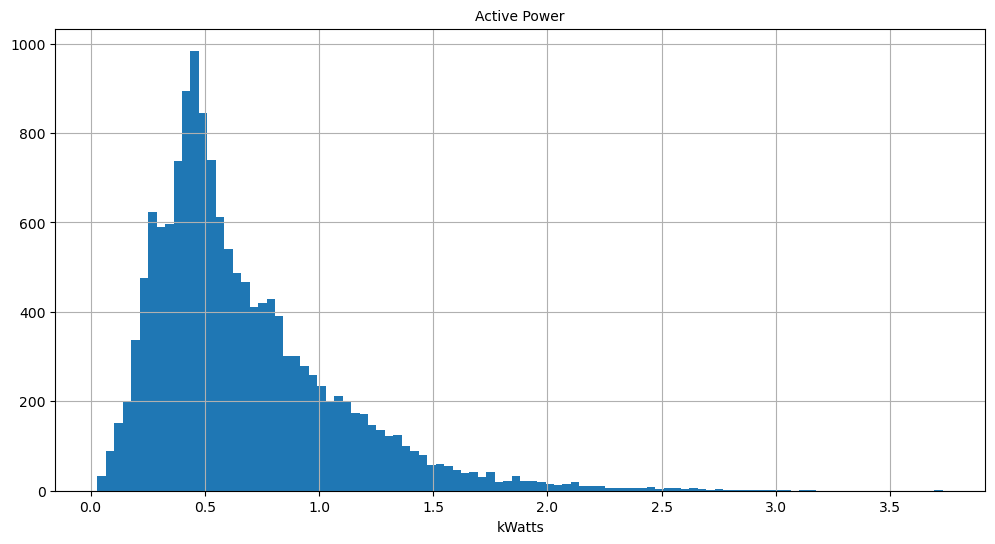

In [13]:
df_arc['active_power'].hist(bins=100, figsize=(12,6))
plt.title('Active Power',fontsize = 10)
plt.xlabel('kWatts',fontsize = 10)

Text(0.5, 0, 'VAR')

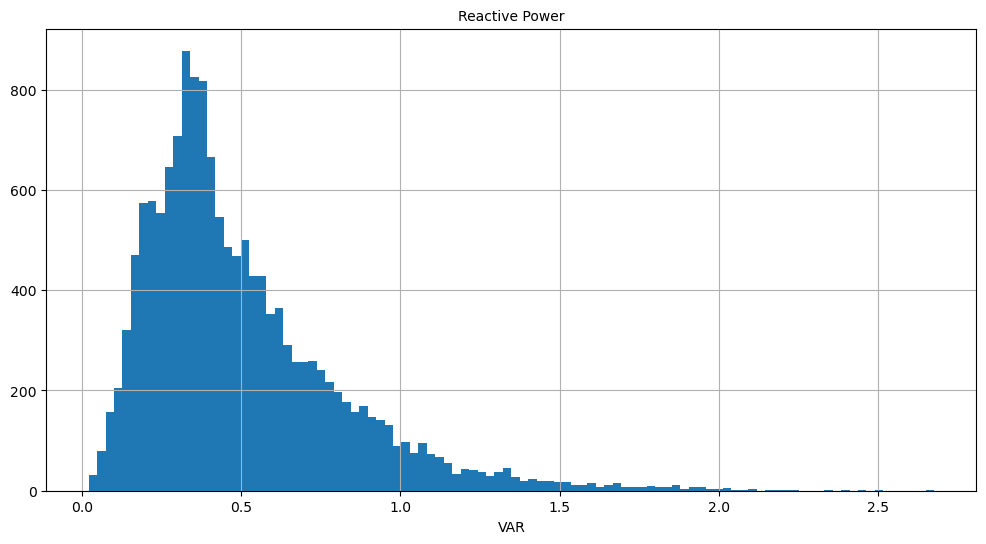

In [14]:
df_arc['reactive_power'].loc[df_arc['reactive_power'] > 0].hist(bins=100, figsize=(12,6))
plt.title('Reactive Power',fontsize = 10)
plt.xlabel('VAR',fontsize = 10)

Text(0.5, 0, 'Duration (seconds)')

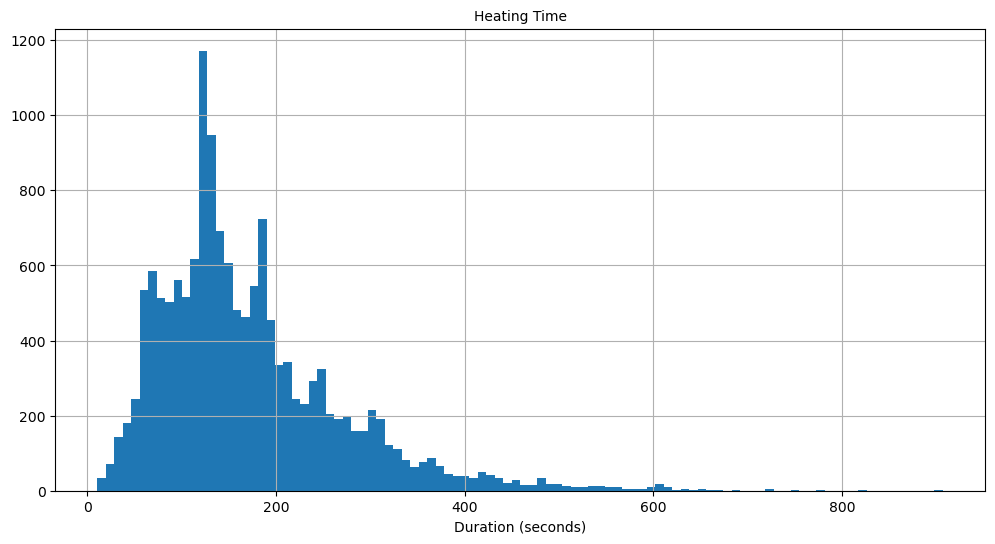

In [15]:
df_arc['duration_seconds'].hist(bins=100, figsize=(12,6))
plt.title('Heating Time',fontsize = 10)
plt.xlabel('Duration (seconds)',fontsize = 10)

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. There are 2 columns with incorrect data types: arc_heating_start and arc_heating_end. The data type is updated to datetime.

3. All values for 'active_power' are positive.

4. Only 1 value of 'reactive_poswer' is negative, of which we might need to omit this record of data.

5. There is no missing values.

6. There is no duplicate data.

7. From these data, we can see that different batch numbers are used for each batch. The df_arc data frame contains data on the start and end of arc heating, active and reactive power. Data on batches need to be in order. There is no gaps in the data, which means that the measuring instruments have caught and transmitted all the information in full.

#### data_bulk

In [16]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_bulk = pd.read_csv(os.path.join(path, 'data_bulk_en.csv'))
df_bulk.head(10)

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   
5    6     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
6    7     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
7    8     NaN     NaN     NaN    99.0     NaN     NaN     NaN     NaN   
8    9     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
9   10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0  
5     NaN      NaN      NaN    204.0      NaN    201.0    154.0  
6     NaN      NaN      NaN    204.0      NaN    152.0    154.0  
7     NaN      NaN      NaN    410.0      NaN    252.0    153.0  
8     NaN      NaN      NaN    107.0      NaN     99.0    203.0  
9     NaN      NaN      NaN    203.0      NaN    102.0    204.0

In [17]:
df_bulk.shape

(3129, 16)

In [18]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [19]:
# Standardise column names
df_bulk.columns = df_bulk.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [20]:
# Count missing values for each column
df_bulk_missing_values_count = df_bulk.isna().sum()

# Calculate the percentage of missing values for each column
df_bulk_total_cells = len(df_bulk)
df_bulk_missing_percentage = (df_bulk_missing_values_count / df_bulk_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_bulk_missing_data = pd.DataFrame({
    'Missing Values': df_bulk_missing_values_count,
    'Percentage (%)': df_bulk_missing_percentage.round(2)
})

print(df_bulk_missing_data)

         Missing Values  Percentage (%)
key                   0            0.00
bulk_1             2877           91.95
bulk_2             3107           99.30
bulk_3             1831           58.52
bulk_4             2115           67.59
bulk_5             3052           97.54
bulk_6             2553           81.59
bulk_7             3104           99.20
bulk_8             3128           99.97
bulk_9             3110           99.39
bulk_10            2953           94.38
bulk_11            2952           94.34
bulk_12             679           21.70
bulk_13            3111           99.42
bulk_14             323           10.32
bulk_15             881           28.16


In [21]:
# Checking duplicates data
df_bulk.duplicated().sum()

0

This dataset shows the volume of bulk solids was added to steel when alloying steel. There are many gaps in the dataset. We understand that if there is no data, they were not added, and the missing value will be replaced by zero.

In [22]:
# Checking Data Distribution with Initial Descriptive Statistics
df_bulk.describe()

key      bulk_1      bulk_2       bulk_3       bulk_4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           bulk_5      bulk_6      bulk_7  bulk_8      bulk_9     bulk_10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     81.790646   72.057776  191.022904     NaN   21.720581   26.060347   
min     11.000000   17.000000   47.000000    49.0   63.000000   24.000000   
25%     70.000000   69.750000  155.000000    49.0   66.000000   64.000000   
50%     86.000000  100.000000  298.000000    49.0   68.000000   86.500000   
75%    132.000000  157.000000  406.000000    49.0   70.500000  102.000000   
max    603.000000  503.000000  772.000000    49.0  147.000000  159.000000   

          bulk_11      bulk_12     bulk_13      bulk_14      bulk_15  
count  177.000000  2450.000000   18.000000  2806.000000  2248.000000  
mean    76.819209   260.471020  181.111111   170.284747   160.513345  
std     59.655365   120.649269   46.088009    65.868652    51.765319  
min      8.000000    53.000000  151.000000    16.000000     1.000000  
25%     25.000000   204.000000  153.250000   119.000000   105.000000  
50%     64.000000   208.000000  155.500000   151.000000   160.000000  
75%    106.000000   316.000000  203.500000   205.750000   205.000000  
max    313.000000  1849.000000  305.000000   636.000000   405.000000

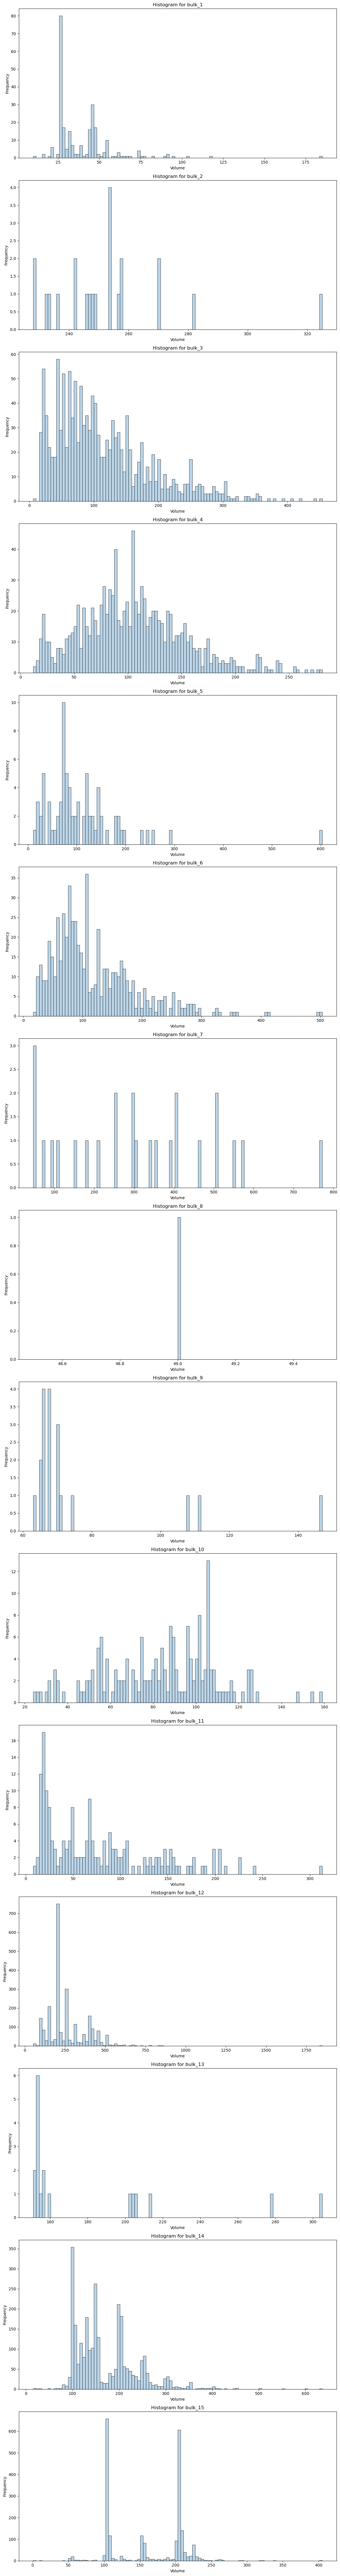

In [23]:
bulk_columns = [column for column in df_bulk.columns if column.startswith('bulk')]

fig, axes = plt.subplots(nrows=len(bulk_columns), figsize=(12, 6 * len(bulk_columns)))

for i, column in enumerate(bulk_columns):
    data = df_bulk[df_bulk[column] != 0][column]
    
    sns.histplot(data, bins=100, alpha=0.3, ax=axes[i])
    
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel('Volume')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

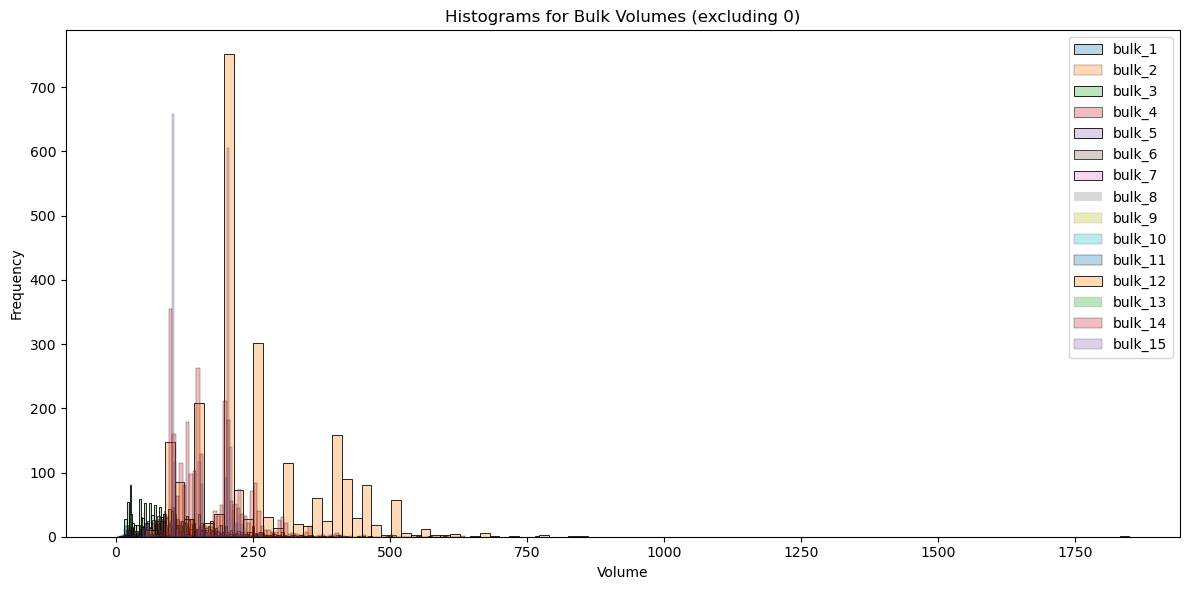

In [24]:
bulk_columns = [column for column in df_bulk.columns if column.startswith('bulk')]

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

for column in bulk_columns:
    data = df_bulk[df_bulk[column] != 0][column]
    
    sns.histplot(data, bins=100, alpha=0.3, label=column)

ax.set_title('Histograms for Bulk Volumes (excluding 0)')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. More than 90% of the data in columns bulk_1, bulk_2, bulk_5, bulk_7, bulk_8, bulk_9, bulk_10, bulk_11, bulk_13 are missing.

3. There are missing data in columns bulk_3, bulk_4, bulk_6 with a percentage between 50% - 80%.

4. There are missing data in columns bulk_12 and bulk_15 with a percentage between 21% - 28%.

5. bulk_14 has the lowest amount of missing data with a percentage of 10%.

6. There is no duplicate data.

#### data_bulk_time

In [25]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_bulk_time = pd.read_csv(os.path.join(path, 'data_bulk_time_en.csv'))
df_bulk_time.head(10)

key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:21:30    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:46:38    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:31:06    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:48:43    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:18:50    NaN    NaN    NaN    NaN   
5    6    NaN    NaN    NaN  2019-05-03 13:59:24    NaN    NaN    NaN    NaN   
6    7    NaN    NaN    NaN  2019-05-03 14:29:14    NaN    NaN    NaN    NaN   
7    8    NaN    NaN    NaN  2019-05-03 15:04:05    NaN    NaN    NaN    NaN   
8    9    NaN    NaN    NaN  2019-05-03 15:47:34    NaN    NaN    NaN    NaN   
9   10    NaN    NaN    NaN                  NaN    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:03:52     NaN  2019-05-03 11:03:52   
1    NaN     NaN     NaN  2019-05-03 11:40:20     NaN  2019-05-03 11:40:20   
2    NaN     NaN     NaN  2019-05-03 12:09:40     NaN  2019-05-03 12:09:40   
3    NaN     NaN     NaN  2019-05-03 12:41:24     NaN  2019-05-03 12:41:24   
4    NaN     NaN     NaN  2019-05-03 13:12:56     NaN  2019-05-03 13:12:56   
5    NaN     NaN     NaN  2019-05-03 13:53:27     NaN  2019-05-03 13:53:27   
6    NaN     NaN     NaN  2019-05-03 14:22:19     NaN  2019-05-03 14:22:19   
7    NaN     NaN     NaN  2019-05-03 14:55:46     NaN  2019-05-03 14:55:46   
8    NaN     NaN     NaN  2019-05-03 15:41:00     NaN  2019-05-03 15:41:00   
9    NaN     NaN     NaN  2019-05-03 16:18:52     NaN  2019-05-03 16:18:52   

               Bulk 15  
0  2019-05-03 11:03:52  
1  2019-05-03 11:40:20  
2  2019-05-03 12:09:40  
3  2019-05-03 12:41:24  
4  2019-05-03 13:12:56  
5  2019-05-03 13:53:27  
6  2019-05-03 14:22:19  
7  2019-05-03 14:55:46  
8  2019-05-03 15:41:00  
9  2019-05-03 16:18:52

In [26]:
df_bulk_time.shape

(3129, 16)

In [27]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [28]:
# Standardise column names
df_bulk_time.columns = df_bulk_time.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [29]:
# Changing the datetime format of the columns bulk materials columns

df_bulk_time_columns = df_bulk_time.columns[1:].tolist()

for column in df_bulk_time_columns:
    df_bulk_time[column] = pd.to_datetime(df_bulk_time[column], errors='coerce')


df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [30]:
# Count missing values for each column
df_bulk_time_missing_values_count = df_bulk_time.isna().sum()

# Calculate the percentage of missing values for each column
df_bulk_time_total_cells = len(df_bulk_time)
df_bulk_time_missing_percentage = (df_bulk_time_missing_values_count / df_bulk_time_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_bulk_time_missing_data = pd.DataFrame({
    'Missing Values': df_bulk_time_missing_values_count,
    'Percentage (%)': df_bulk_time_missing_percentage.round(2)
})

print(df_bulk_time_missing_data)

         Missing Values  Percentage (%)
key                   0            0.00
bulk_1             2877           91.95
bulk_2             3107           99.30
bulk_3             1831           58.52
bulk_4             2115           67.59
bulk_5             3052           97.54
bulk_6             2553           81.59
bulk_7             3104           99.20
bulk_8             3128           99.97
bulk_9             3110           99.39
bulk_10            2953           94.38
bulk_11            2952           94.34
bulk_12             679           21.70
bulk_13            3111           99.42
bulk_14             323           10.32
bulk_15             881           28.16


Dataset "df_bulk_time" shows the time of addition of bulk materials during alloying of steel. There are many gaps in the dataset. Judging by the gaps in df_bulk_time and the df_bulk dataset, we understand that there can be no time information if the substance is not added. Thus we need to check that gaps in df_bulk if they match gaps in df_bulk_time. We replace the missing values in df_bulk_time with zeros.

In [31]:
# Missing values for both datasets (df_bulk & df_bulk_time)
df_bulk_missing = df_bulk.isna()
df_bulk_time_missing = df_bulk_time.isna()

# Check if the missing values match between the two DataFrames
matching_gaps = df_bulk_missing.equals(df_bulk_time_missing)

# Display the result
print("Do the gaps in df_bulk match the gaps in df_bulk_time?", matching_gaps)

Do the gaps in df_bulk match the gaps in df_bulk_time? True


We can conclude that the gaps in df_bulk match the gaps in df_bulk_time.

In [32]:
# Checking duplicates data
df_bulk_time.duplicated().sum()

0

In [33]:
# Checking Data Distribution with Initial Descriptive Statistics
df_bulk_time.describe()

key
count  3129.000000
mean   1624.383509
std     933.337642
min       1.000000
25%     816.000000
50%    1622.000000
75%    2431.000000
max    3241.000000

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. More than 90% of the data in columns bulk_1, bulk_2, bulk_5, bulk_7, bulk_8, bulk_9, bulk_10, bulk_11, bulk_13 are missing.

3. There are missing data in columns bulk_3, bulk_4, bulk_6 with a percentage between 50% - 80%.

4. There are missing data in columns bulk_12 and bulk_15 with a percentage between 21% - 28%.

5. bulk_14 has the lowest amount of missing data with a percentage of 10%.

6. There is no duplicate data.

7. The missing values in df_bulk_time matched the missing values in df_bulk. It means that when data is missing in df_bulk, the corresponding data in df_bulk_time is also missing.


#### data_gas

In [34]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_gas = pd.read_csv(os.path.join(path, 'data_gas_en.csv'))
df_gas.head(10)

key      Gas 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
5    6  11.273392
6    7   9.836267
7    8  15.171553
8    9   8.216623
9   10   6.529891

In [35]:
df_gas.shape

(3239, 2)

In [36]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Gas 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [37]:
# Standardise column names
df_gas.columns = df_gas.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [38]:
# Count missing values for each column
df_gas_missing_values_count = df_gas.isna().sum()

# Calculate the percentage of missing values for each column
df_gas_total_cells = len(df_gas)
df_gas_missing_percentage = (df_gas_missing_values_count / df_gas_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_gas_missing_data = pd.DataFrame({
    'Missing Values': df_gas_missing_values_count,
    'Percentage (%)': df_gas_missing_percentage.round(2)
})

print(df_gas_missing_data)

       Missing Values  Percentage (%)
key                 0             0.0
gas_1               0             0.0


In [39]:
# Checking duplicates data
df_gas.duplicated().sum()

0

In [40]:
# Checking Data Distribution with Initial Descriptive Statistics
df_gas.describe()

key        gas_1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

Text(0.5, 0, 'Volume')

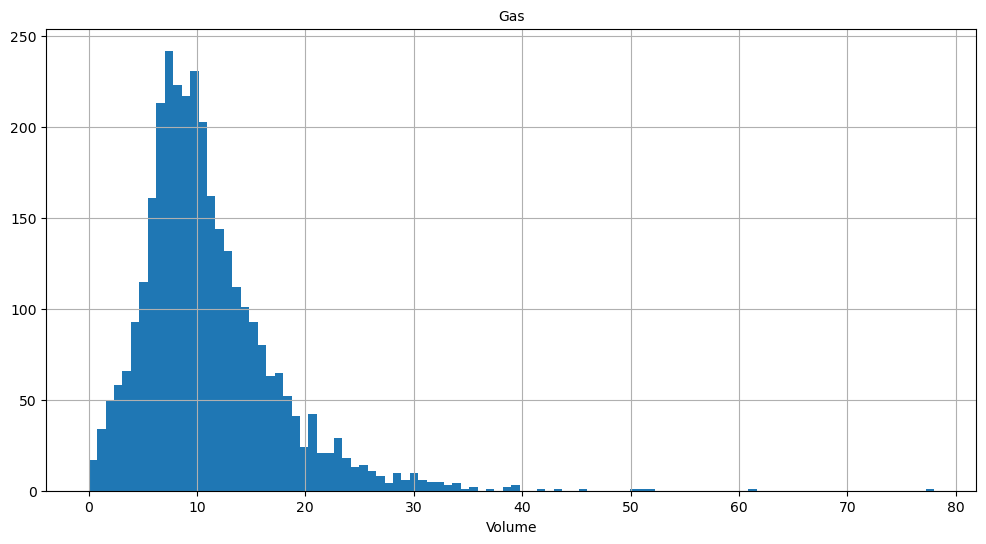

In [41]:
df_gas['gas_1'].hist(bins=100, figsize=(12,6))
plt.title('Gas',fontsize = 10)
plt.xlabel('Volume',fontsize = 10)

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. All values for 'gas_1' are positive.

3. There is no missing values.

4. There is no duplcicate data.

#### data_temp

In [42]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_temp = pd.read_csv(os.path.join(path, 'data_temp_en.csv'))
df_temp.head(10)

key        Sampling time  Temperature
0    1  2019-05-03 11:16:18       1571.0
1    1  2019-05-03 11:25:53       1604.0
2    1  2019-05-03 11:29:11       1618.0
3    1  2019-05-03 11:30:01       1601.0
4    1  2019-05-03 11:30:39       1613.0
5    2  2019-05-03 11:37:27       1581.0
6    2  2019-05-03 11:38:00       1577.0
7    2  2019-05-03 11:49:38       1589.0
8    2  2019-05-03 11:55:50       1604.0
9    2  2019-05-03 11:58:24       1608.0

In [43]:
df_temp.shape

(15907, 3)

In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   Sampling time  15907 non-null  object 
 2   Temperature    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [45]:
# Standardise column names
df_temp.columns = df_temp.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   sampling_time  15907 non-null  object 
 2   temperature    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [46]:
# Changing the datetime format of the columns "sampling_time"

df_temp['sampling_time'] = pd.to_datetime(df_temp['sampling_time'])

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            15907 non-null  int64         
 1   sampling_time  15907 non-null  datetime64[ns]
 2   temperature    13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [47]:
# Count missing values for each column
df_temp_missing_values_count = df_temp.isna().sum()

# Calculate the percentage of missing values for each column
df_temp_total_cells = len(df_temp)
df_temp_missing_percentage = (df_temp_missing_values_count / df_temp_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_temp_missing_data = pd.DataFrame({
    'Missing Values': df_temp_missing_values_count,
    'Percentage (%)': df_temp_missing_percentage.round(2)
})

print(df_temp_missing_data)

               Missing Values  Percentage (%)
key                         0            0.00
sampling_time               0            0.00
temperature              2901           18.24


In [48]:
# Checking duplicates data
df_temp.duplicated().sum()

0

In [49]:
# Checking Data Distribution with Initial Descriptive Statistics
df_temp.describe()

key   temperature
count  15907.000000  13006.000000
mean    1607.880870   1591.840920
std      942.212073     21.375851
min        1.000000   1191.000000
25%      790.000000   1581.000000
50%     1618.000000   1591.000000
75%     2427.000000   1601.000000
max     3241.000000   1705.000000

Text(0.5, 0, 'Degree Celcius')

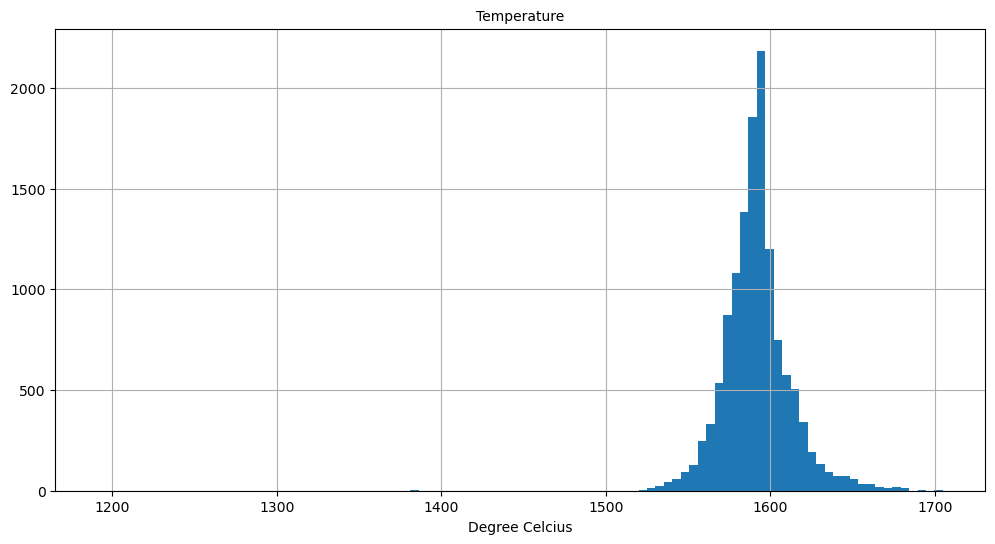

In [50]:
df_temp['temperature'].hist(bins=100, figsize=(12,6))
plt.title('Temperature',fontsize = 10)
plt.xlabel('Degree Celcius',fontsize = 10)

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. There is incorrect data type for measurement_time. The data type for measurament_time is corrected to datetime.

3. There are missing values in temperature column with a percentage of 18%. We shall further investigate in later section.

4. There is no duplicate data.

#### data_wire

In [51]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_wire = pd.read_csv(os.path.join(path, 'data_wire_en.csv'))
df_wire.head(10)

key      Wire 1     Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1   60.059998        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2   96.052315        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3   91.160157        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4   89.063515        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5   89.238236   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
5    6   99.109917   9.114560     NaN     NaN     NaN     NaN     NaN     NaN   
6    7   98.061600        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7    8  155.282394        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8    9  113.393279   9.143681     NaN     NaN     NaN     NaN     NaN     NaN   
9   10   81.244796  12.376000     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN

In [52]:
df_wire.shape

(3081, 10)

In [53]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [54]:
# Standardise column names
df_wire.columns = df_wire.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [55]:
# Count missing values for each column
df_wire_missing_values_count = df_wire.isna().sum()

# Calculate the percentage of missing values for each column
df_wire_total_cells = len(df_wire)
df_wire_missing_percentage = (df_wire_missing_values_count / df_wire_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_wire_missing_data = pd.DataFrame({
    'Missing Values': df_wire_missing_values_count,
    'Percentage (%)': df_wire_missing_percentage.round(2)
})

print(df_wire_missing_data)

        Missing Values  Percentage (%)
key                  0            0.00
wire_1              26            0.84
wire_2            2002           64.98
wire_3            3018           97.96
wire_4            3067           99.55
wire_5            3080           99.97
wire_6            3008           97.63
wire_7            3070           99.64
wire_8            3062           99.38
wire_9            3052           99.06


In [56]:
# Checking duplicates data
df_wire.duplicated().sum()

0

In [57]:
# Checking Data Distribution with Initial Descriptive Statistics
df_wire.describe()

key       wire_1       wire_2      wire_3      wire_4  wire_5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           wire_6     wire_7      wire_8     wire_9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std     33.919845   8.610584   16.881728  19.931616  
min      0.034320   0.234208   45.076721   4.622800  
25%     25.053600   6.762756   46.094879  22.058401  
50%     42.076324   9.017009   46.279999  30.066399  
75%     64.212723  11.886057   48.089603  43.862003  
max    180.454575  32.847674  102.762401  90.053604

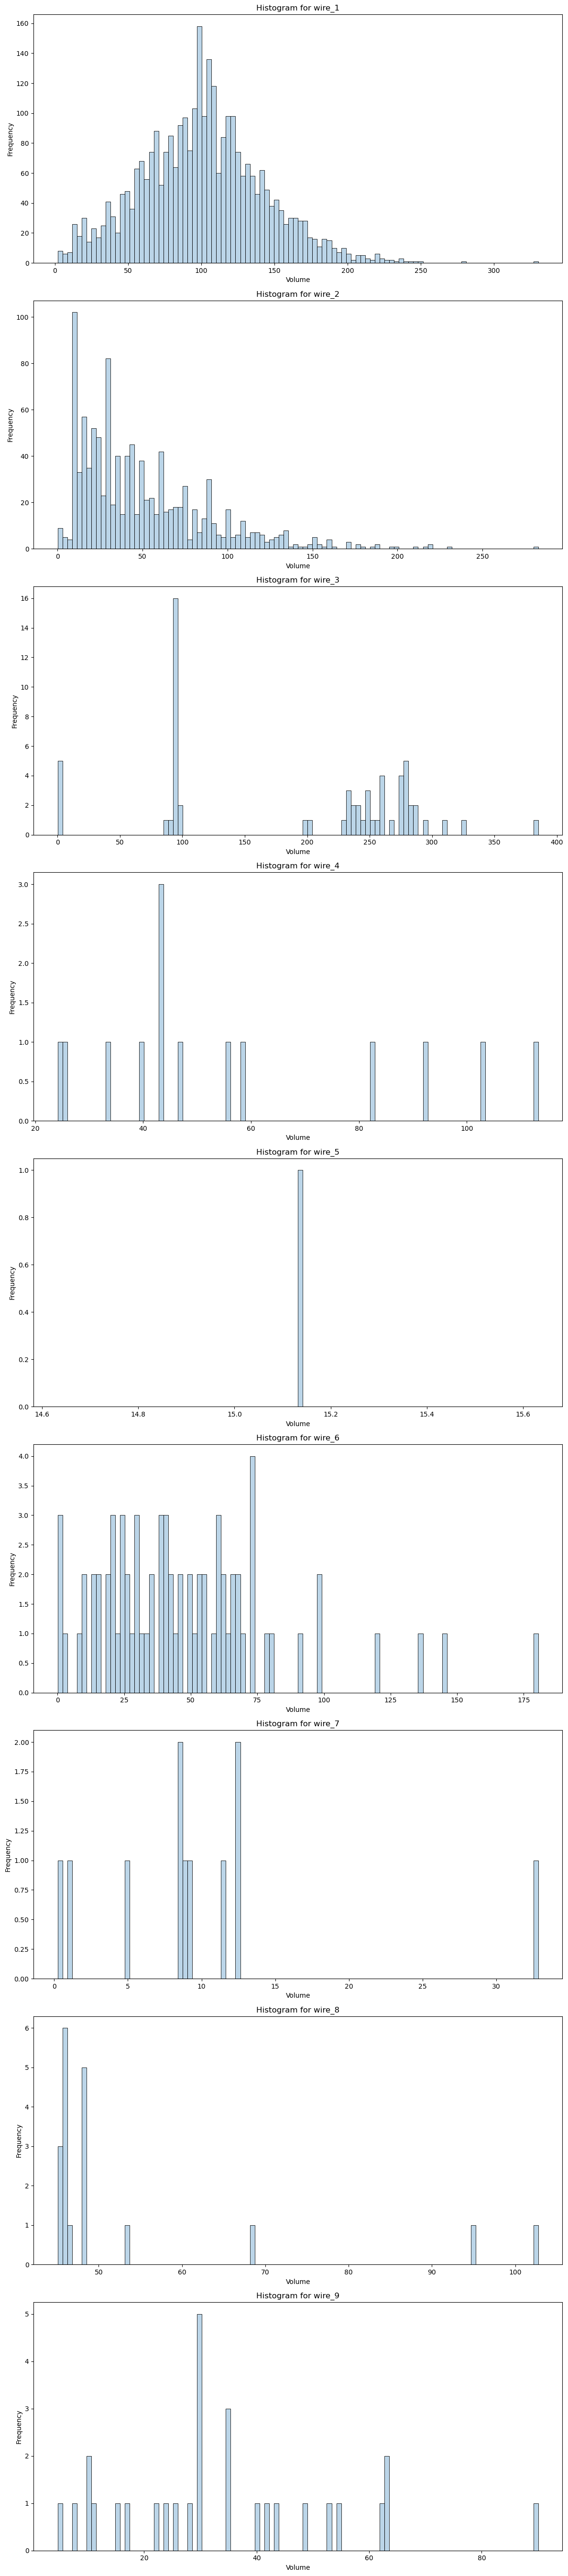

In [58]:
wire_columns = [column for column in df_wire.columns if column.startswith('wire')]

fig, axes = plt.subplots(nrows=len(wire_columns), figsize=(12, 6 * len(wire_columns)))

for i, column in enumerate(wire_columns):
    data = df_wire[df_wire[column] != 0][column]
    
    sns.histplot(data, bins=100, alpha=0.3, ax=axes[i])
    
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel('Volume')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

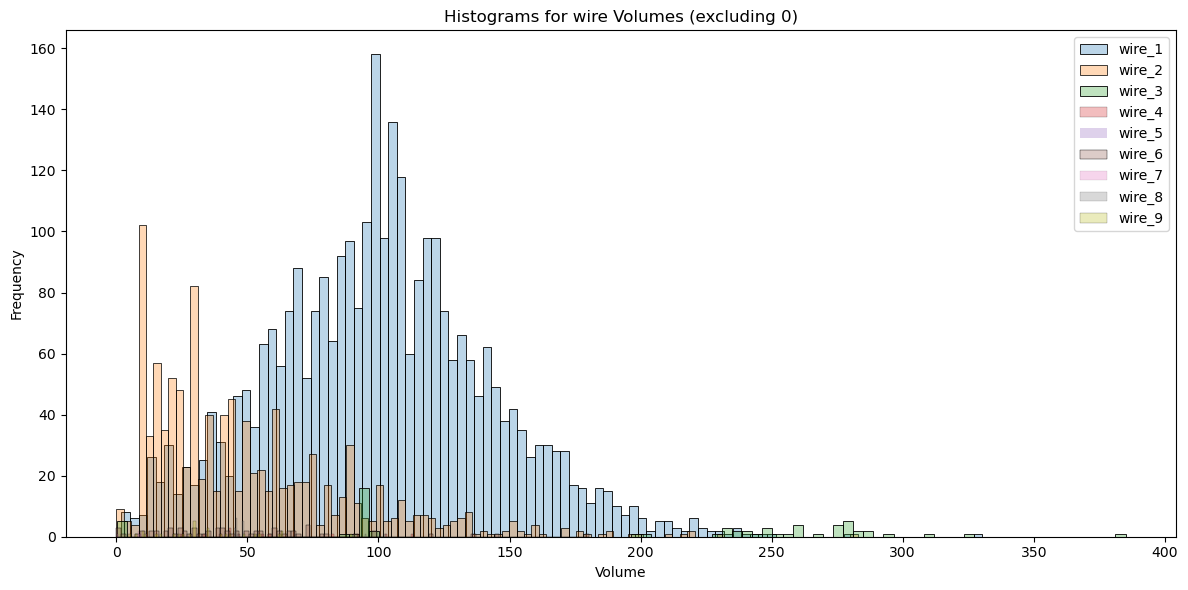

In [59]:
wire_columns = [column for column in df_wire.columns if column.startswith('wire')]

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

for column in wire_columns:
    data = df_wire[df_wire[column] != 0][column]
    
    sns.histplot(data, bins=100, alpha=0.3, label=column)

ax.set_title('Histograms for wire Volumes (excluding 0)')
ax.set_xlabel('Volume')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. More than 90% of data in columns wire_3, wire_4, wire_5, wire_6, wire_7, wire_8, wire_9 are missing.

3. More than half of the data in column wire_2 are missing with a percentage 64.98%.

4. wire_1 has the lowest amount of missing data with a percentage of 0.84%.

5. There is no duplicate data.

6. There is only 1 record for wire_5. We shall exclude this column for further analysis.

#### data_wire_time

In [60]:
# Load & Examine the Data
path = r'C:\Users\shinw\Data Science Project by TripleTen (ex Practicum)\Sprint 17 - Final Project'
df_wire_time = pd.read_csv(os.path.join(path, 'data_wire_time_en.csv'))
df_wire_time.head(10)

key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:11:41                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:46:10                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:13:47                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:48:05                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:18:15  2019-05-03 13:32:06    NaN    NaN    NaN    NaN   
5    6  2019-05-03 13:59:02  2019-05-03 13:59:54    NaN    NaN    NaN    NaN   
6    7  2019-05-03 14:28:46                  NaN    NaN    NaN    NaN    NaN   
7    8  2019-05-03 15:03:42                  NaN    NaN    NaN    NaN    NaN   
8    9  2019-05-03 15:42:43  2019-05-03 15:58:12    NaN    NaN    NaN    NaN   
9   10  2019-05-03 16:20:25  2019-05-03 16:21:02    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN  
5    NaN    NaN    NaN  
6    NaN    NaN    NaN  
7    NaN    NaN    NaN  
8    NaN    NaN    NaN  
9    NaN    NaN    NaN

In [61]:
df_wire_time.shape

(3081, 10)

In [62]:
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [63]:
# Standardise column names
df_wire_time.columns = df_wire_time.columns.str.lower().str.replace(' ', '_')

# Display the updated DataFrame
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [64]:
# Changing the datetime format of the columns of all wires

df_wire_time_columns = df_wire_time.columns[1:].tolist()

for column in df_wire_time_columns:
    df_wire_time[column] = pd.to_datetime(df_wire_time[column], errors='coerce')


df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [65]:
# Count missing values for each column
df_wire_time_missing_values_count = df_wire_time.isna().sum()

# Calculate the percentage of missing values for each column
df_wire_time_total_cells = len(df_wire_time)
df_wire_time_missing_percentage = (df_wire_time_missing_values_count / df_wire_time_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_wire_time_missing_data = pd.DataFrame({
    'Missing Values': df_wire_time_missing_values_count,
    'Percentage (%)': df_wire_time_missing_percentage.round(2)
})

print(df_wire_time_missing_data)

        Missing Values  Percentage (%)
key                  0            0.00
wire_1              26            0.84
wire_2            2002           64.98
wire_3            3018           97.96
wire_4            3067           99.55
wire_5            3080           99.97
wire_6            3008           97.63
wire_7            3070           99.64
wire_8            3062           99.38
wire_9            3052           99.06


Dataset "df_wire_time" shows the time of addition of wired materials during alloying of steel. There are many gaps in the dataset. Judging by the gaps in df_wire_time and the df_wire dataset, we understand that there can be no time information if the substance is not added. Thus we need to check that gaps in df_wire if they match gaps in df_wire_time. We replace the missing values in df_wire_time with zeros.

In [66]:
# Missing values for both datasets (df_wire & df_wire_time)
df_wire_missing = df_wire.isna()
df_wire_time_missing = df_wire_time.isna()

# Check if the missing values match between the two DataFrames
matching_gaps = df_wire_missing.equals(df_wire_time_missing)

# Display the result
print("Do the gaps in df_wire match the gaps in df_wire_time?", matching_gaps)

Do the gaps in df_wire match the gaps in df_wire_time? True


We can conclude that the gaps in df_wire match the gaps in df_wire_time.

In [67]:
# Checking duplicates data
df_wire_time.duplicated().sum()

0

In [68]:
# Checking Data Distribution with Initial Descriptive Statistics
df_wire_time.describe()

key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000

**Findings:**

1. The column names are standardised (lowercases and the space is replaced with underscore).

2. The data type for wire_columns are incorrect. They are corrected to datetime.

3. More than 90% of data in columns wire_3, wire_4 wire_5, wire_6, wire_7, wire_8, wire_9 are missing.

4. More than half of the data in column wire_2 are missing with a percentage 64.98%.

5. wire_1 has the lowest amount of missing data with a percentage of 0.84%.

6. The missing values in df_wire_time matched the missing values in df_wire. It means that when data is missing in df_wire, the corresponding data in df_wire_time is also missing.

7. There is no duplicate data.

#### Section Conclusions of Data Pre-processing

1. There are many missing data in df_bulk, df_bulk_time, df_wire, df_wire_time and df_temp. This means either the data was lost (not measured) or some batches did not go through certain stages of processing, which is also possible.

2. Missing values in df_bulk_time followed the same pattern as df_bulk.

3. Missing values in df_wire_time follow the same pattern as df_wire.

4. Incorrect data type - date and time values need to be converted to the datetime format.

5. Inconsistent column names. They are standardised to lowercase and the space is replaced with underscore.

### Exploratory Data Analysis (EDA)

#### df_arc: Summarising sum_active_power,  sum_reactive power and sum_duration_seconds

In [69]:
df_arc_copy = df_arc.query('reactive_power > 0')
df_arc_sum = pd.pivot_table(df_arc_copy, index = 'key', values = ['active_power', 'reactive_power', 'duration_seconds'],
                            aggfunc={'active_power': np.sum,
                                     'reactive_power': np.sum,
                                     'duration_seconds': np.sum})

In [70]:
df_arc_sum = df_arc_sum.rename(columns = {
    "active_power" : "sum_active_power",
    "reactive_power" : "sum_reactive_power",
    "duration_seconds" : "sum_duration_seconds"
})

In [71]:
df_arc_sum.head(10)

sum_active_power  sum_duration_seconds  sum_reactive_power
key                                                            
1            4.878147                1098.0            3.183241
2            3.052598                 811.0            1.998112
3            2.525882                 655.0            1.599076
4            3.209250                 741.0            2.060298
5            3.347173                 869.0            2.252643
6            3.955108                 952.0            2.689175
7            2.547375                 673.0            1.561295
8            3.762755                 913.0            2.680698
9            2.081951                 625.0            1.478671
10           2.923622                 825.0            2.496116

In [72]:
df_arc_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sum_active_power      3214 non-null   float64
 1   sum_duration_seconds  3214 non-null   float64
 2   sum_reactive_power    3214 non-null   float64
dtypes: float64(3)
memory usage: 100.4 KB


#### df_bulk & df_bulk_time: Filling the missing values with zero

Since bulk_8 has only 1 record, thus we will remove this column from df_bulk.

In [73]:
df_bulk = df_bulk.drop(['bulk_8'], axis=1)

This dataset, df_bulk shows the volume of bulk solids was added to steel when alloying steel. There are many gaps in the dataset. We understand that if there is no data, they were not added, and the missing value will be replaced by zero.

In [74]:
# Filling df_bulk missing values with zeros.

df_bulk = df_bulk.fillna(0)
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_2   3129 non-null   float64
 3   bulk_3   3129 non-null   float64
 4   bulk_4   3129 non-null   float64
 5   bulk_5   3129 non-null   float64
 6   bulk_6   3129 non-null   float64
 7   bulk_7   3129 non-null   float64
 8   bulk_9   3129 non-null   float64
 9   bulk_10  3129 non-null   float64
 10  bulk_11  3129 non-null   float64
 11  bulk_12  3129 non-null   float64
 12  bulk_13  3129 non-null   float64
 13  bulk_14  3129 non-null   float64
 14  bulk_15  3129 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 366.8 KB


In [75]:
# Making columns name specific to the dataset, e.g. volume for df_bulk

# Add "_volume" to each column name
df_bulk.columns = [f'{col}_volume' if col != 'key' else col for col in df_bulk.columns]

# Display the updated DataFrame
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             3129 non-null   int64  
 1   bulk_1_volume   3129 non-null   float64
 2   bulk_2_volume   3129 non-null   float64
 3   bulk_3_volume   3129 non-null   float64
 4   bulk_4_volume   3129 non-null   float64
 5   bulk_5_volume   3129 non-null   float64
 6   bulk_6_volume   3129 non-null   float64
 7   bulk_7_volume   3129 non-null   float64
 8   bulk_9_volume   3129 non-null   float64
 9   bulk_10_volume  3129 non-null   float64
 10  bulk_11_volume  3129 non-null   float64
 11  bulk_12_volume  3129 non-null   float64
 12  bulk_13_volume  3129 non-null   float64
 13  bulk_14_volume  3129 non-null   float64
 14  bulk_15_volume  3129 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 366.8 KB


Dataset "df_bulk_time" shows the time of addition of bulk substances during alloying of steel. There are many gaps in the dataset. Judging by the gaps in this dataset and the df_bulk dataset, we understand that there can be no time information if the substance is not added. Thus we need to check that gaps in df_bulk if they match gaps in df_bulk_time. We replace the missing values in df_bulk_time with zeros.

Since bulk_8 has only 1 record, thus we will remove this column from df_bulk_time.

In [76]:
df_bulk_time = df_bulk_time.drop(['bulk_8'], axis=1)

In [77]:
# Filling df_bulk_time missing values with zeros.

df_bulk_time = df_bulk_time.fillna(0)
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   3129 non-null   object
 2   bulk_2   3129 non-null   object
 3   bulk_3   3129 non-null   object
 4   bulk_4   3129 non-null   object
 5   bulk_5   3129 non-null   object
 6   bulk_6   3129 non-null   object
 7   bulk_7   3129 non-null   object
 8   bulk_9   3129 non-null   object
 9   bulk_10  3129 non-null   object
 10  bulk_11  3129 non-null   object
 11  bulk_12  3129 non-null   object
 12  bulk_13  3129 non-null   object
 13  bulk_14  3129 non-null   object
 14  bulk_15  3129 non-null   object
dtypes: int64(1), object(14)
memory usage: 366.8+ KB


In [78]:
# Making columns name specific to the dataset, e.g. volume for df_bulk_time

# Add "datetime" to each column name
df_bulk_time.columns = [f'{col}_datetime' if col != 'key' else col for col in df_bulk_time.columns]

# Display the updated DataFrame
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   key               3129 non-null   int64 
 1   bulk_1_datetime   3129 non-null   object
 2   bulk_2_datetime   3129 non-null   object
 3   bulk_3_datetime   3129 non-null   object
 4   bulk_4_datetime   3129 non-null   object
 5   bulk_5_datetime   3129 non-null   object
 6   bulk_6_datetime   3129 non-null   object
 7   bulk_7_datetime   3129 non-null   object
 8   bulk_9_datetime   3129 non-null   object
 9   bulk_10_datetime  3129 non-null   object
 10  bulk_11_datetime  3129 non-null   object
 11  bulk_12_datetime  3129 non-null   object
 12  bulk_13_datetime  3129 non-null   object
 13  bulk_14_datetime  3129 non-null   object
 14  bulk_15_datetime  3129 non-null   object
dtypes: int64(1), object(14)
memory usage: 366.8+ KB


#### df_temp: Data Cleaning & Aggregating

We will categorize the following conditions as 'excluded_key' based on either of the following criteria:

1. The maximum sampling_time in df_temp for a given key is less than the maximum 'arc_heating_end' time in df_arc for the same key.

2. The maximum and minimum sampling_time are the same for a given key in df_temp.

In [79]:
excluded_key = []

# Loop over unique keys in df_temp
for key in list(df_temp['key'].unique()):
    try:
        # Conditions based on df_temp and df_arc
        condition1 = df_temp[df_temp['key'] == key]['sampling_time'].max() < df_arc[df_arc['key'] == key]['arc_heating_end'].max()
        condition2 = df_temp[df_temp['key'] == key]['sampling_time'].max() == df_temp[df_temp['key'] == key]['sampling_time'].min()
        
        # Check if any condition is True
        if condition1 or condition2:
            excluded_key.append(key)
    except Exception as e:
        # Handle specific exceptions and add comments
        print(f"Error processing key {key}: {str(e)}")
        excluded_key.append(key)
        

In [80]:
print(excluded_key, len(excluded_key))

[11, 38, 43, 51, 64, 69, 73, 81, 177, 179, 180, 182, 185, 195, 213, 216, 220, 222, 267, 271, 279, 293, 296, 297, 321, 325, 326, 444, 445, 448, 453, 456, 470, 471, 472, 491, 535, 562, 586, 587, 588, 590, 592, 593, 596, 616, 638, 641, 704, 731, 733, 741, 757, 786, 869, 870, 874, 878, 928, 929, 932, 934, 997, 1057, 1060, 1152, 1153, 1161, 1232, 1313, 1316, 1341, 1371, 1381, 1402, 1433, 1458, 1461, 1464, 1493, 1505, 1558, 1578, 1618, 1622, 1623, 1624, 1639, 1657, 1683, 1685, 1712, 1713, 1720, 1724, 1811, 1813, 1837, 1872, 1873, 1876, 1946, 1949, 1964, 1966, 1987, 1989, 1990, 1992, 1993, 1994, 2053, 2078, 2138, 2140, 2142, 2143, 2152, 2211, 2221, 2261, 2263, 2265, 2300, 2303, 2389, 2390, 2393, 2398, 2425, 2427, 2451, 2457, 2522, 2540, 2543, 2544, 2572, 2601, 2604, 2606, 2667, 2670, 2671, 2695, 2698, 2736, 2743, 2787, 2808, 2809, 2814, 2838, 2842, 2843, 2862, 2898, 2951, 2960, 2988, 3044, 3047, 3146, 3153, 3156, 3187, 3204, 3209, 3211, 3212, 3216] 171


There are 171 batches that do not have a final measurement temperature.

In [81]:
df_temp = df_temp.query('key not in @excluded_key')
df_temp = df_temp.dropna()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12381 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            12381 non-null  int64         
 1   sampling_time  12381 non-null  datetime64[ns]
 2   temperature    12381 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 386.9 KB


In [82]:
# After the removal of the gaps, we will remove the values of mentioning parties that are less than two.
counting_excluded_key = (df_temp['key'].value_counts() < 2).sum() 
good_keys = list(df_temp['key'].value_counts().index[:-counting_excluded_key])
df_temp = df_temp.query('key in @good_keys')
df_temp['key'].value_counts()

1513    16
46      16
44      16
1214    16
1689    15
        ..
1836     2
744      2
273      2
830      2
951      2
Name: key, Length: 2344, dtype: int64

In [83]:
agg_df_temp = pd.pivot_table(df_temp,values='sampling_time', index='key', aggfunc={'sampling_time': [np.min, np.max]})
agg_df_temp

amax                amin
key                                         
1    2019-05-03 11:30:39 2019-05-03 11:16:18
2    2019-05-03 11:59:12 2019-05-03 11:37:27
3    2019-05-03 12:34:57 2019-05-03 12:13:17
4    2019-05-03 12:59:25 2019-05-03 12:52:57
5    2019-05-03 13:36:01 2019-05-03 13:23:19
...                  ...                 ...
2495 2019-08-06 00:54:42 2019-08-06 00:35:45
2496 2019-08-06 01:29:52 2019-08-06 01:02:54
2497 2019-08-06 01:53:50 2019-08-06 01:41:53
2498 2019-08-06 02:25:31 2019-08-06 02:03:49
2499 2019-08-06 03:00:28 2019-08-06 02:40:25

[2344 rows x 2 columns]

In [84]:
# Finding start temperature and end temperature , based on 'min' and 'max' temperature time, indexed by 'key'
start_time_list = list(agg_df_temp['amin'])
end_time_list = list(agg_df_temp['amax'])

In [85]:
start_temp = df_temp.query('sampling_time in @start_time_list ')
start_temp = start_temp.set_index('key')
end_temp = df_temp.query('sampling_time in @end_time_list ')
end_temp = end_temp.set_index('key')

In [86]:
start_temp.head()

sampling_time  temperature
key                                 
1   2019-05-03 11:16:18       1571.0
2   2019-05-03 11:37:27       1581.0
3   2019-05-03 12:13:17       1596.0
4   2019-05-03 12:52:57       1601.0
5   2019-05-03 13:23:19       1576.0

In [87]:
end_temp.head()

sampling_time  temperature
key                                 
1   2019-05-03 11:30:39       1613.0
2   2019-05-03 11:59:12       1602.0
3   2019-05-03 12:34:57       1599.0
4   2019-05-03 12:59:25       1625.0
5   2019-05-03 13:36:01       1602.0

In [88]:
df_temp_final = start_temp.copy()
df_temp_final.columns = ['sampling_time','start_temp']
df_temp_final['end_temp'] = end_temp['temperature']

In [89]:
df_temp_final = df_temp_final.drop('sampling_time', axis=1)
df_temp_final.head()

start_temp  end_temp
key                      
1        1571.0    1613.0
2        1581.0    1602.0
3        1596.0    1599.0
4        1601.0    1625.0
5        1576.0    1602.0

In [90]:
df_temp_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_temp  2344 non-null   float64
 1   end_temp    2344 non-null   float64
dtypes: float64(2)
memory usage: 54.9 KB


#### df_wire & df_wire_time: Filling the missing values with zero

Since wire_5 has only 1 record, thus we will remove this column from df_wire.

In [91]:
df_wire = df_wire.drop(['wire_5'], axis=1)

In [92]:
# Filling df_wire missing values with zeros.

df_wire = df_wire.fillna(0)
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_6  3081 non-null   float64
 6   wire_7  3081 non-null   float64
 7   wire_8  3081 non-null   float64
 8   wire_9  3081 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 216.8 KB


In [93]:
# Making columns name specific to the dataset, e.g. volume for df_wire

# Add "_volume" to each column name
df_wire.columns = [f'{col}_volume' if col != 'key' else col for col in df_wire.columns]

# Display the updated DataFrame
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            3081 non-null   int64  
 1   wire_1_volume  3081 non-null   float64
 2   wire_2_volume  3081 non-null   float64
 3   wire_3_volume  3081 non-null   float64
 4   wire_4_volume  3081 non-null   float64
 5   wire_6_volume  3081 non-null   float64
 6   wire_7_volume  3081 non-null   float64
 7   wire_8_volume  3081 non-null   float64
 8   wire_9_volume  3081 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 216.8 KB


Since wire_5 has only 1 record, thus we will remove this column from df_wire_time.

In [94]:
df_wire_time = df_wire_time.drop(['wire_5'], axis=1)

In [95]:
# Filling df_wire_time missing values with zeros.

df_wire_time = df_wire_time.fillna(0)
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3081 non-null   object
 2   wire_2  3081 non-null   object
 3   wire_3  3081 non-null   object
 4   wire_4  3081 non-null   object
 5   wire_6  3081 non-null   object
 6   wire_7  3081 non-null   object
 7   wire_8  3081 non-null   object
 8   wire_9  3081 non-null   object
dtypes: int64(1), object(8)
memory usage: 216.8+ KB


In [96]:
# Making columns name specific to the dataset, e.g. volume for df_wire_time

# Add "_datetime" to each column name
df_wire_time.columns = [f'{col}_datetime' if col != 'key' else col for col in df_wire_time.columns]

# Display the updated DataFrame
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   key              3081 non-null   int64 
 1   wire_1_datetime  3081 non-null   object
 2   wire_2_datetime  3081 non-null   object
 3   wire_3_datetime  3081 non-null   object
 4   wire_4_datetime  3081 non-null   object
 5   wire_6_datetime  3081 non-null   object
 6   wire_7_datetime  3081 non-null   object
 7   wire_8_datetime  3081 non-null   object
 8   wire_9_datetime  3081 non-null   object
dtypes: int64(1), object(8)
memory usage: 216.8+ KB


#### Data concatenation

We will combine all data except df_bulk_time & df_wire_time to prevent data leak by the datetime columns.

In [97]:
df_bulk = df_bulk.set_index('key')
df_bulk_time = df_bulk_time.set_index('key')
df_gas = df_gas.set_index('key')
df_wire = df_wire.set_index('key')
df_wire_time = df_wire_time.set_index('key')

In [98]:
df_final = pd.concat([df_arc_sum, df_temp_final, df_bulk, df_gas, df_wire], axis=1, sort=False)

In [99]:
# The target attribute is end_temp. We have to delete all fields where it is missing.

df_final = df_final.dropna(subset=['end_temp'])

In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 1 to 2499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sum_active_power      2344 non-null   float64
 1   sum_duration_seconds  2344 non-null   float64
 2   sum_reactive_power    2344 non-null   float64
 3   start_temp            2344 non-null   float64
 4   end_temp              2344 non-null   float64
 5   bulk_1_volume         2283 non-null   float64
 6   bulk_2_volume         2283 non-null   float64
 7   bulk_3_volume         2283 non-null   float64
 8   bulk_4_volume         2283 non-null   float64
 9   bulk_5_volume         2283 non-null   float64
 10  bulk_6_volume         2283 non-null   float64
 11  bulk_7_volume         2283 non-null   float64
 12  bulk_9_volume         2283 non-null   float64
 13  bulk_10_volume        2283 non-null   float64
 14  bulk_11_volume        2283 non-null   float64
 15  bulk_12_volume       

In [101]:
# Count missing values for each column
df_final_missing_values_count = df_final.isna().sum()

# Calculate the percentage of missing values for each column
df_final_total_cells = len(df_final)
df_final_missing_percentage = (df_final_missing_values_count / df_final_total_cells) * 100

# Create a DataFrame to display missing value count and percentage
df_final_missing_data = pd.DataFrame({
    'Missing Values': df_final_missing_values_count,
    'Percentage (%)': df_final_missing_percentage.round(2)
})

print(df_final_missing_data)

                      Missing Values  Percentage (%)
sum_active_power                   0            0.00
sum_duration_seconds               0            0.00
sum_reactive_power                 0            0.00
start_temp                         0            0.00
end_temp                           0            0.00
bulk_1_volume                     61            2.60
bulk_2_volume                     61            2.60
bulk_3_volume                     61            2.60
bulk_4_volume                     61            2.60
bulk_5_volume                     61            2.60
bulk_6_volume                     61            2.60
bulk_7_volume                     61            2.60
bulk_9_volume                     61            2.60
bulk_10_volume                    61            2.60
bulk_11_volume                    61            2.60
bulk_12_volume                    61            2.60
bulk_13_volume                    61            2.60
bulk_14_volume                    61          

In [102]:
# Filling missing values with zero

df_final = df_final.fillna(0)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 1 to 2499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sum_active_power      2344 non-null   float64
 1   sum_duration_seconds  2344 non-null   float64
 2   sum_reactive_power    2344 non-null   float64
 3   start_temp            2344 non-null   float64
 4   end_temp              2344 non-null   float64
 5   bulk_1_volume         2344 non-null   float64
 6   bulk_2_volume         2344 non-null   float64
 7   bulk_3_volume         2344 non-null   float64
 8   bulk_4_volume         2344 non-null   float64
 9   bulk_5_volume         2344 non-null   float64
 10  bulk_6_volume         2344 non-null   float64
 11  bulk_7_volume         2344 non-null   float64
 12  bulk_9_volume         2344 non-null   float64
 13  bulk_10_volume        2344 non-null   float64
 14  bulk_11_volume        2344 non-null   float64
 15  bulk_12_volume       

#### Correlation Matrix

In [103]:
df_final.columns

Index(['sum_active_power', 'sum_duration_seconds', 'sum_reactive_power',
       'start_temp', 'end_temp', 'bulk_1_volume', 'bulk_2_volume',
       'bulk_3_volume', 'bulk_4_volume', 'bulk_5_volume', 'bulk_6_volume',
       'bulk_7_volume', 'bulk_9_volume', 'bulk_10_volume', 'bulk_11_volume',
       'bulk_12_volume', 'bulk_13_volume', 'bulk_14_volume', 'bulk_15_volume',
       'gas_1', 'wire_1_volume', 'wire_2_volume', 'wire_3_volume',
       'wire_4_volume', 'wire_6_volume', 'wire_7_volume', 'wire_8_volume',
       'wire_9_volume'],
      dtype='object')

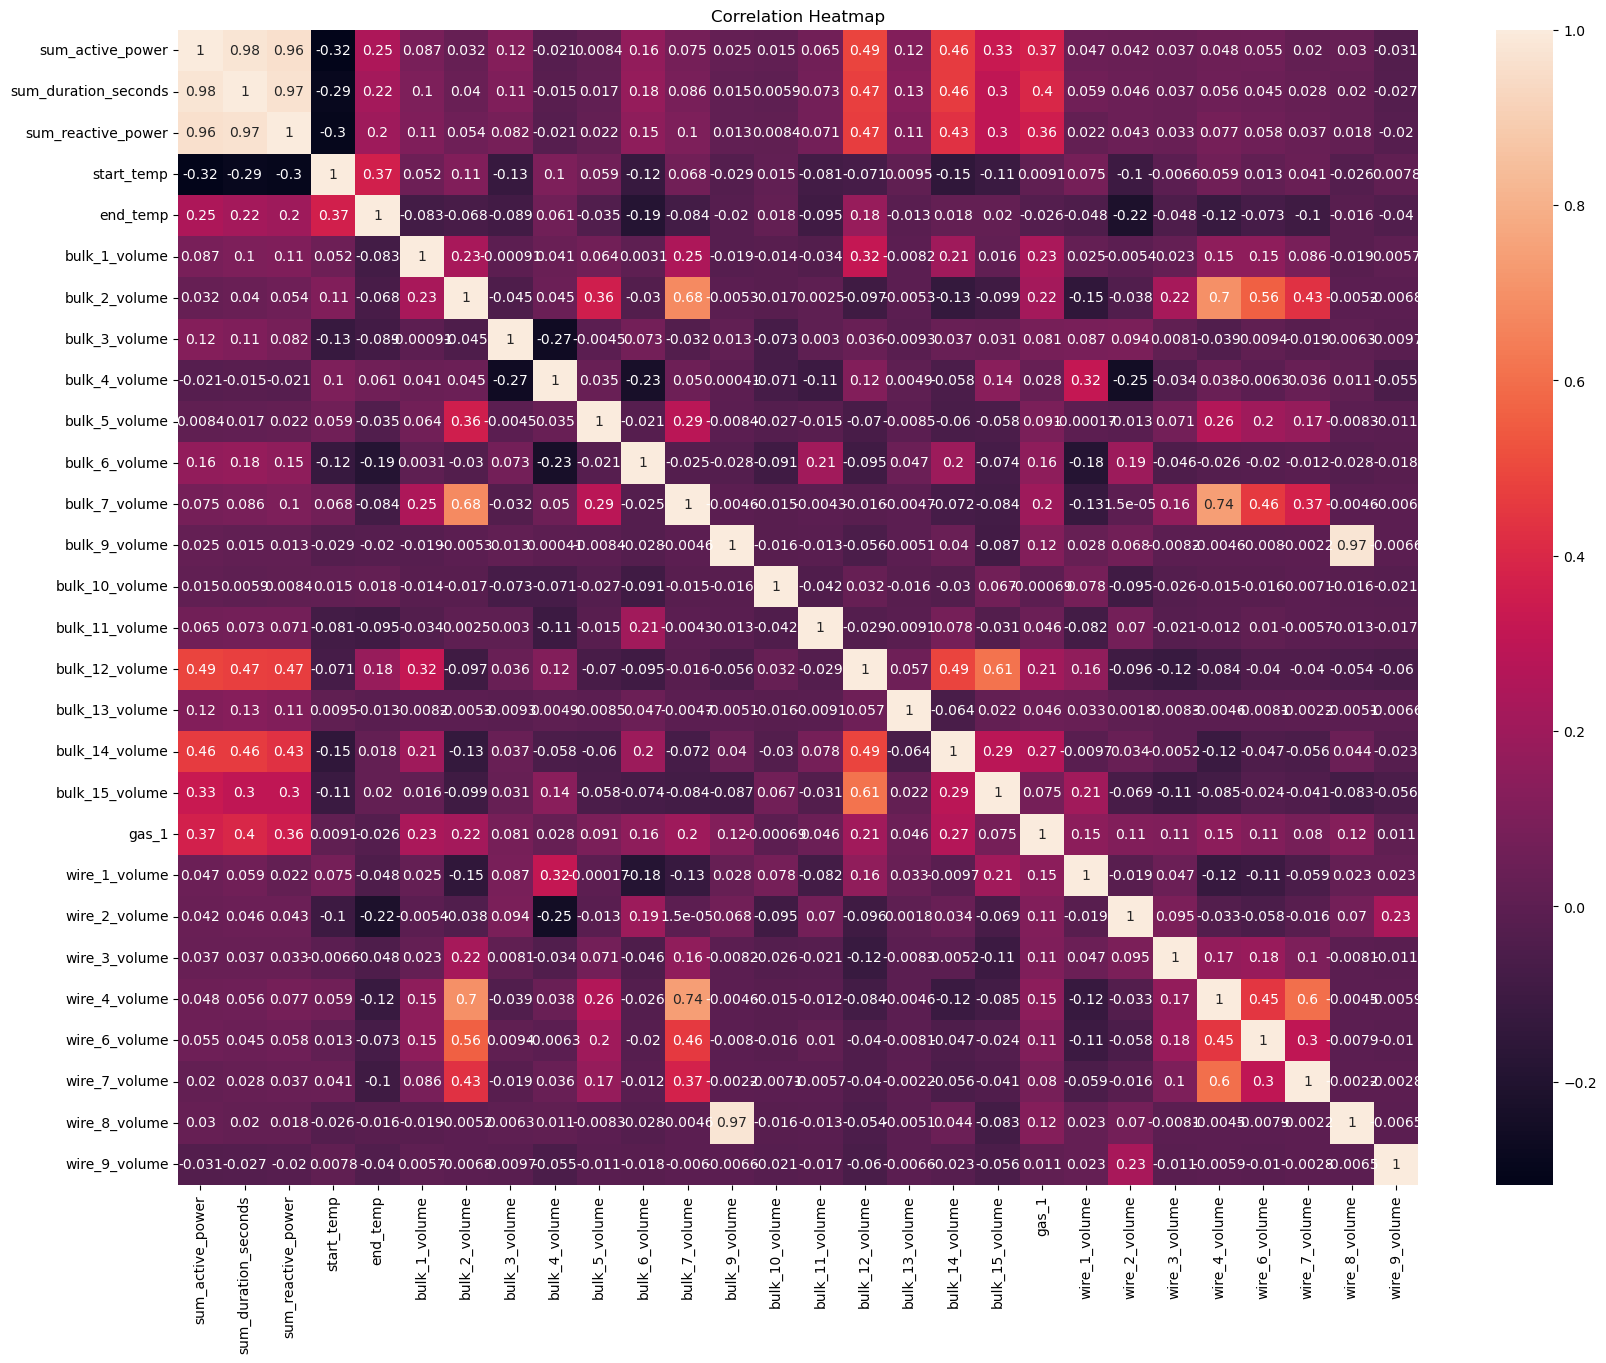

In [104]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df_final.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

**Findings:**

1. The correlation coefficient between the features sum_active_power and sum_reactive_power is very high (0.96). We will remove sum_reactive_power from the model to avoid overfitting.

2. The correlation coefficient between the features sum_active_power and sum_duration_seconds is very high (0.98). We will remove sum_duration_seconds from the model to avoid overfitting.

3. The correlation matrix says that Mix 9 and wire 8 are almost identical. We can delete one of them. Let's delete Mix 9 because it has much in common with Mix 8. It is also possible to remove the values of the duration of the electric current supply to the electrodes from the data because the power value takes into account this value.

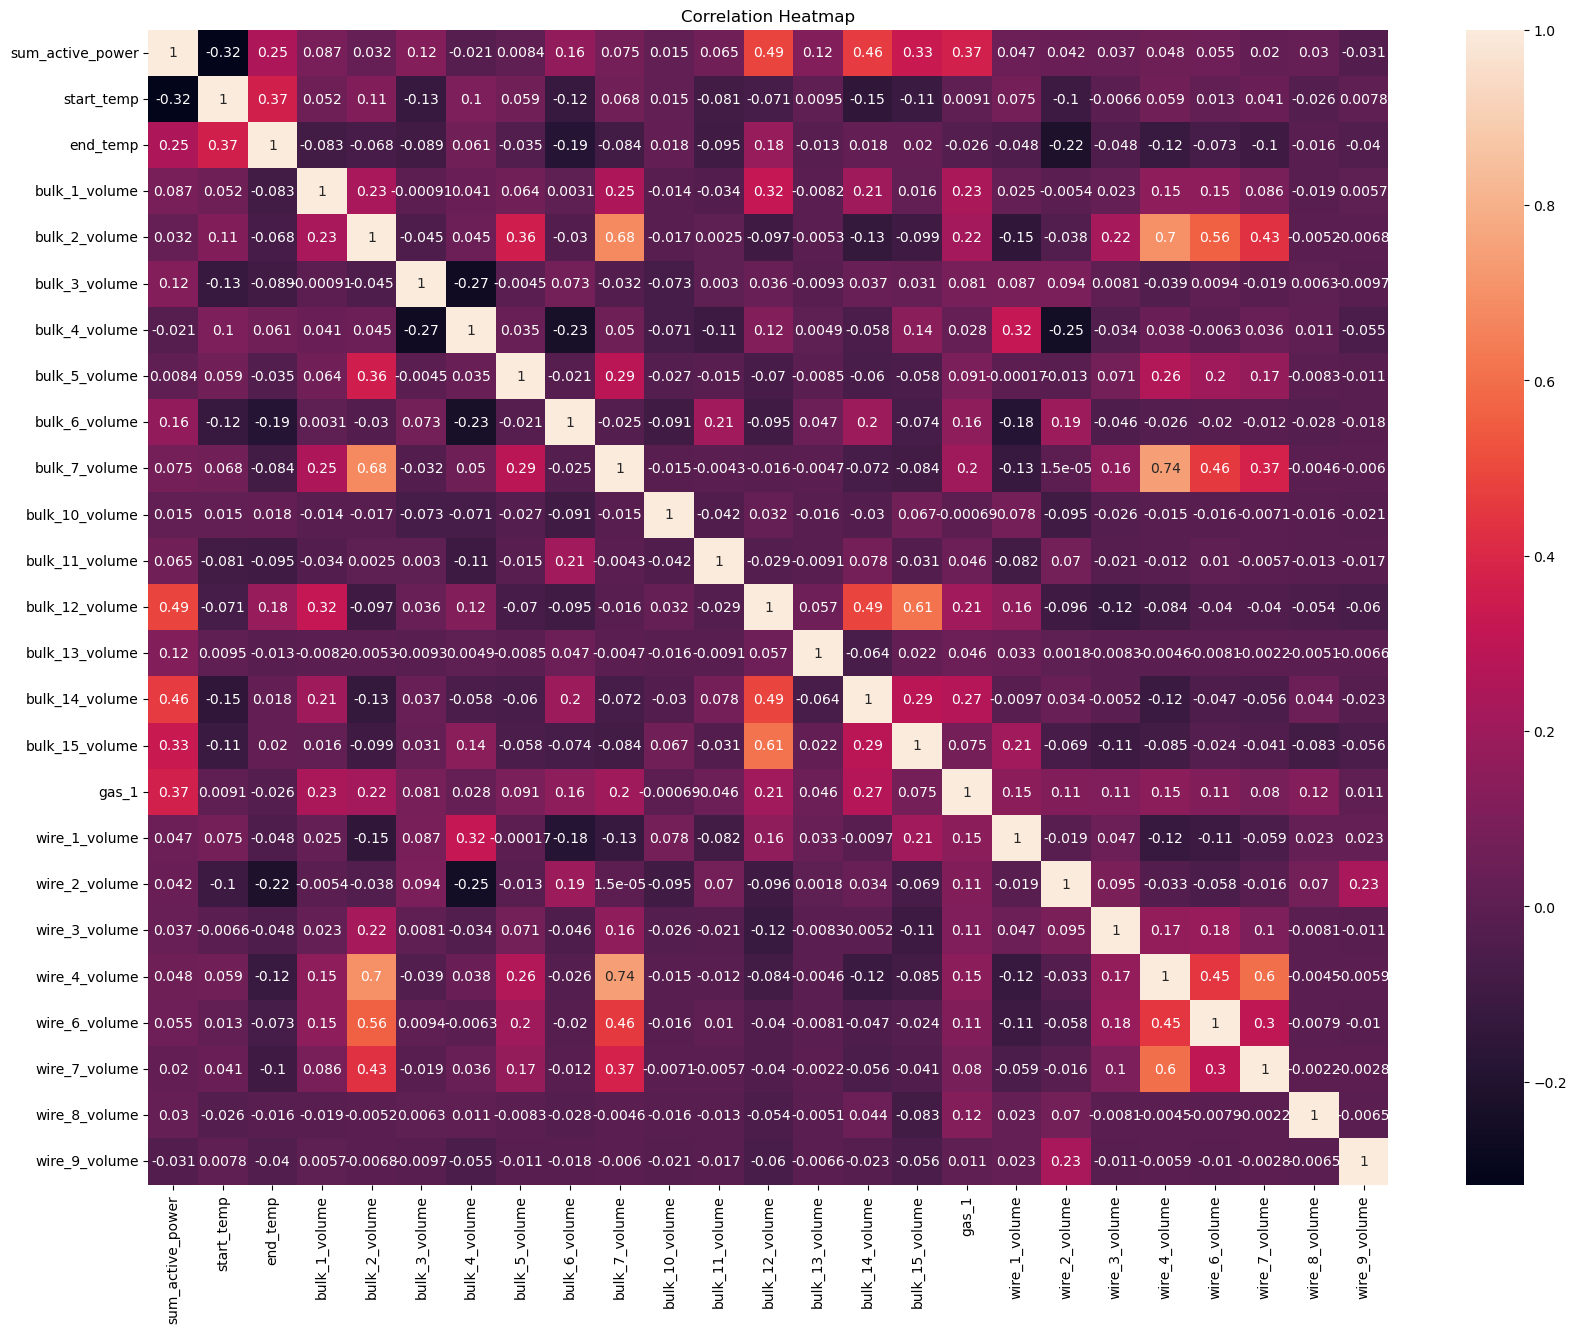

In [105]:
# drop sum_reactive_power & sum_duration_seconds columns

df_final = df_final.drop(['sum_reactive_power', 'sum_duration_seconds', 'bulk_9_volume'], axis=1)

plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df_final.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

**Remarks:**

The target variable is 'end_temp'. We will evaluate the correlation between features and target.

In [106]:
df_final.corr()['end_temp'].abs().sort_values(ascending = False)

end_temp            1.000000
start_temp          0.366398
sum_active_power    0.247650
wire_2_volume       0.215639
bulk_6_volume       0.188054
bulk_12_volume      0.180171
wire_4_volume       0.121044
wire_7_volume       0.100990
bulk_11_volume      0.095105
bulk_3_volume       0.088806
bulk_7_volume       0.084039
bulk_1_volume       0.082638
wire_6_volume       0.073452
bulk_2_volume       0.067612
bulk_4_volume       0.061157
wire_1_volume       0.048129
wire_3_volume       0.048014
wire_9_volume       0.039511
bulk_5_volume       0.034697
gas_1               0.025723
bulk_15_volume      0.019843
bulk_10_volume      0.018222
bulk_14_volume      0.017625
wire_8_volume       0.016397
bulk_13_volume      0.012884
Name: end_temp, dtype: float64

#### Anomalies / Outliers

**Scan for anomalies:**

As we can see, some data have little effect on the final temperature, some do not. Let's see if there are outliers (anomalies) among them using the KNN model.

To detect the presence of anomaliesor outlier data, the 'PyOD' library will be used by importing the KNN algorithm. This algorithm can be used to identify data that is unusual or uncommon in a dataset.

In [107]:
columns_knn = df_final.corr()['end_temp'].abs().sort_values(ascending = False)[1:].index
columns_knn

Index(['start_temp', 'sum_active_power', 'wire_2_volume', 'bulk_6_volume',
       'bulk_12_volume', 'wire_4_volume', 'wire_7_volume', 'bulk_11_volume',
       'bulk_3_volume', 'bulk_7_volume', 'bulk_1_volume', 'wire_6_volume',
       'bulk_2_volume', 'bulk_4_volume', 'wire_1_volume', 'wire_3_volume',
       'wire_9_volume', 'bulk_5_volume', 'gas_1', 'bulk_15_volume',
       'bulk_10_volume', 'bulk_14_volume', 'wire_8_volume', 'bulk_13_volume'],
      dtype='object')

In [108]:
model = KNN()
model.fit(df_final[columns_knn])
df_final['is_outlier'] = model.predict(df_final[columns_knn]) == 1
outliers_knn = df_final['is_outlier'].sum()
print("Number of anomalies (KNN): ", outliers_knn)

Number of anomalies (KNN):  204


**Findings and Action to take:**

1. From the results above, it can be seen that there are 204 anomalous/outlier data points. These data points will be dropped from the final dataset.

In [109]:
# Removing outliers

df_clean = df_final[df_final['is_outlier'] == 0]
df_clean = df_clean.drop(columns  = ['is_outlier'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 1 to 2499
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sum_active_power  2140 non-null   float64
 1   start_temp        2140 non-null   float64
 2   end_temp          2140 non-null   float64
 3   bulk_1_volume     2140 non-null   float64
 4   bulk_2_volume     2140 non-null   float64
 5   bulk_3_volume     2140 non-null   float64
 6   bulk_4_volume     2140 non-null   float64
 7   bulk_5_volume     2140 non-null   float64
 8   bulk_6_volume     2140 non-null   float64
 9   bulk_7_volume     2140 non-null   float64
 10  bulk_10_volume    2140 non-null   float64
 11  bulk_11_volume    2140 non-null   float64
 12  bulk_12_volume    2140 non-null   float64
 13  bulk_13_volume    2140 non-null   float64
 14  bulk_14_volume    2140 non-null   float64
 15  bulk_15_volume    2140 non-null   float64
 16  gas_1             2140 non-null   float64


In [110]:
df_clean.describe()

sum_active_power   start_temp     end_temp  bulk_1_volume  \
count       2140.000000  2140.000000  2140.000000    2140.000000   
mean           3.043380  1589.344860  1595.660280       2.647664   
std            1.340776    24.416362    15.453016      10.230726   
min            0.186226  1519.000000  1550.000000       0.000000   
25%            2.099531  1572.000000  1588.000000       0.000000   
50%            2.945885  1588.000000  1593.000000       0.000000   
75%            3.826722  1605.000000  1599.000000       0.000000   
max           12.361625  1679.000000  1700.000000      92.000000   

       bulk_2_volume  bulk_3_volume  bulk_4_volume  bulk_5_volume  \
count    2140.000000    2140.000000    2140.000000    2140.000000   
mean        0.228972      41.523364      35.689252       0.931776   
std         7.497103      67.680007      57.952280      10.395050   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000      70.000000      73.000000       0.000000   
max       257.000000     405.000000     281.000000     197.000000   

       bulk_6_volume  bulk_7_volume  ...  bulk_15_volume        gas_1  \
count    2140.000000    2140.000000  ...     2140.000000  2140.000000   
mean       17.343925       0.078037  ...      115.804206    10.813301   
std        45.042969       2.565274  ...       85.177792     5.838591   
min         0.000000       0.000000  ...        0.000000     0.000000   
25%         0.000000       0.000000  ...        0.000000     7.036521   
50%         0.000000       0.000000  ...      106.000000     9.787863   
75%         0.000000       0.000000  ...      204.000000    13.530447   
max       294.000000      92.000000  ...      295.000000    60.935689   

       wire_1_volume  wire_2_volume  wire_3_volume  wire_4_volume  \
count    2140.000000    2140.000000    2140.000000    2140.000000   
mean       97.397548      15.562846       0.902831       0.027250   
std        45.698122      30.179392      14.555836       0.899619   
min         0.000000       0.000000       0.000000       0.000000   
25%        69.036236       0.000000       0.000000       0.000000   
50%       100.058403       0.000000       0.000000       0.000000   
75%       125.447392      20.086559       0.000000       0.000000   
max       242.143203     195.225677     293.188919      33.182243   

       wire_6_volume  wire_7_volume  wire_8_volume  wire_9_volume  
count    2140.000000         2140.0    2140.000000    2140.000000  
mean        0.379445            0.0       0.290785       0.367062  
std         4.225958            0.0       4.022506       4.066576  
min         0.000000            0.0       0.000000       0.000000  
25%         0.000000            0.0       0.000000       0.000000  
50%         0.000000            0.0       0.000000       0.000000  
75%         0.000000            0.0       0.000000       0.000000  
max        98.223847            0.0      95.244248      90.053604  

[8 rows x 25 columns]

### Modeling

#### Splitting Dataset

In [111]:
random_state = 43

features = df_clean.drop('end_temp', axis=1)
target = df_clean['end_temp']

features_train, features_test, target_train, target_test = train_test_split(
                                                            features, 
                                                            target, 
                                                            test_size=0.25, 
                                                            random_state=random_state)

In [112]:
features.shape

(2140, 24)

In [113]:
target_train.shape

(1605,)

#### Model Optimisation & Evaluation

In [114]:
# Table of optimisation results
results = pd.DataFrame({'model' : [], 
                        'mae_train' : [], 
                        'train_duration' : [],
                        'best_estimator' : []})

In [115]:
# Decision Tree Regressor
tree = [DecisionTreeRegressor()]
tree_params = [{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                'max_depth' : [x for x in range(1, 11)],
                'min_samples_split': [x for x in range(2, 6)],
                'min_samples_leaf': [x for x in range(1, 6)],
                'random_state': [random_state]}]

# Random Forest Regressor
forest = [RandomForestRegressor()] 
forest_params = [{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                  'max_depth' : [None, 1, 5, 10, 15],
                  'random_state': [random_state]}]

# Linear Regressions
lr = [LinearRegression()]

# Light Gradient Booster Regressor
lgbmr = [lgb.LGBMRegressor(n_estimators=100,n_jobs=-1)]
lgbmr_params = [{'learning_rate': [0.01, 0.05, 0.1, 0.25],
                 'max_depth' : [x for x in range(1, 11)],           
                 'num_leaves':[x for x in range(10,21)],
                 'random_state': [random_state]}]

# CatBoostRegressor
catb = [CatBoostRegressor(verbose=False)]
catr_params = [{'learning_rate': [0.01, 0.05, 0.1],
                'max_depth' : [x for x in range(1, 11)], 
                'random_state': [random_state]}]

# XGBRegressor
xgbr = [xgb.XGBRegressor(n_estimators=100, verbosity=0)]
xgbr_params = [{'learning_rate':[0.01, 0.05, 0.1, 0.25],
                'max_depth' : [x for x in range(1, 5)],
                'subsample': [0.6, 0.7, 0.8, 0.9],
                'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                'random_state': [random_state]}]

In [116]:
cv = 5
def learn_models(models_list, 
                 features_train, 
                 target_train,
                 params={}, 
                 regr_name=''):
        # Select a model from the list, select its parameters
    for model in models_list:
        regr_gs = GridSearchCV(model, params, cv=cv, scoring='neg_mean_absolute_error')
        regr_gs.fit(features_train,target_train)
            
        cv_score = regr_gs.best_score_ *-1
        
        # Train the model, record the start time of training
        regr = regr_gs.best_estimator_
        learning_start = time.time()
        regr.fit(features_train,target_train)
        learning_end = time.time()
        learning_time = learning_end - learning_start
        
        if regr_name == '':
            name = str(model).split(sep='(')[0]
        else: name = regr_name
            
        try:    
        # Plotting a Feature Importance Analysis Graph for a Trained Model
            plt.figure(figsize=(16,5))
            ax = sns.barplot(x=features_train.columns, y=regr.feature_importances_)
            ax.set(xlabel='Feature', ylabel='Importance', title=f'Feature Importance Analysis for Model {name} Training')
            ax.set_xticklabels(features_train.columns, rotation=20, ha='right')
            ax.grid(True)
            plt.show()
        except: pass
        
        # Save the best hyperparameters

        best_params = regr_gs.best_params_
        
        # Write the results to the results table
        
        globals()['results'] = globals()['results'].append({
            'model' : name, 
            'mae_train' : round(cv_score, 5), 
            'train_duration' :  round(learning_time, 2),
            'best_estimator' : regr}, ignore_index=True)
    return plt.show()

**Decision Tree Regressor**

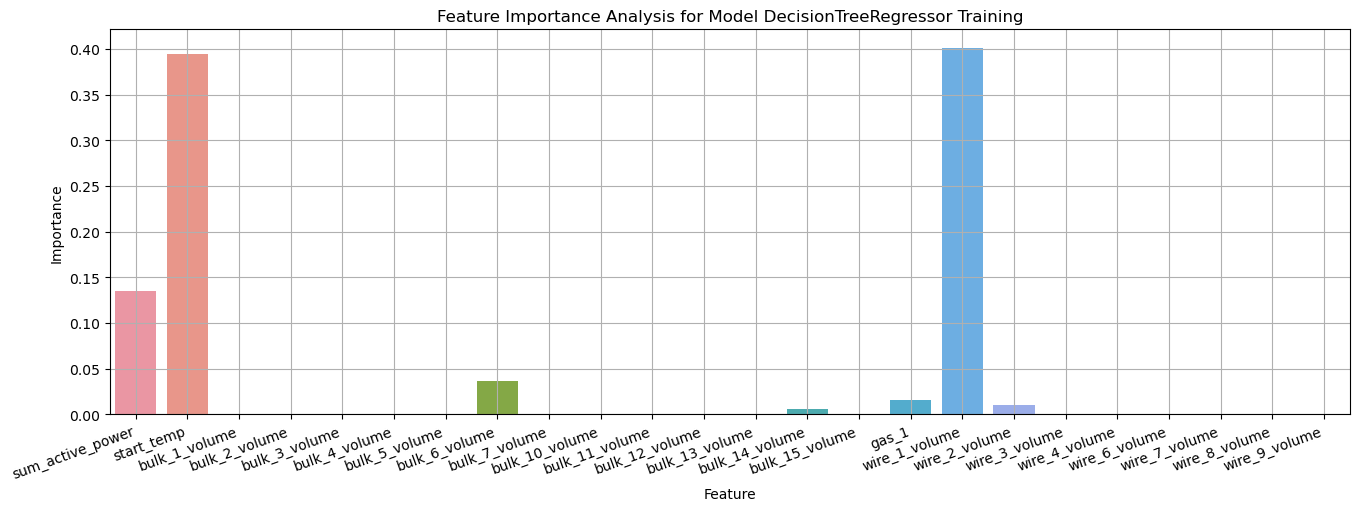

CPU times: total: 16.9 s
Wall time: 17.6 s


In [117]:
%%time
learn_models(tree, 
             features_train, 
             target_train,
             params=tree_params, 
             regr_name='')

**Random Forest Regressor**

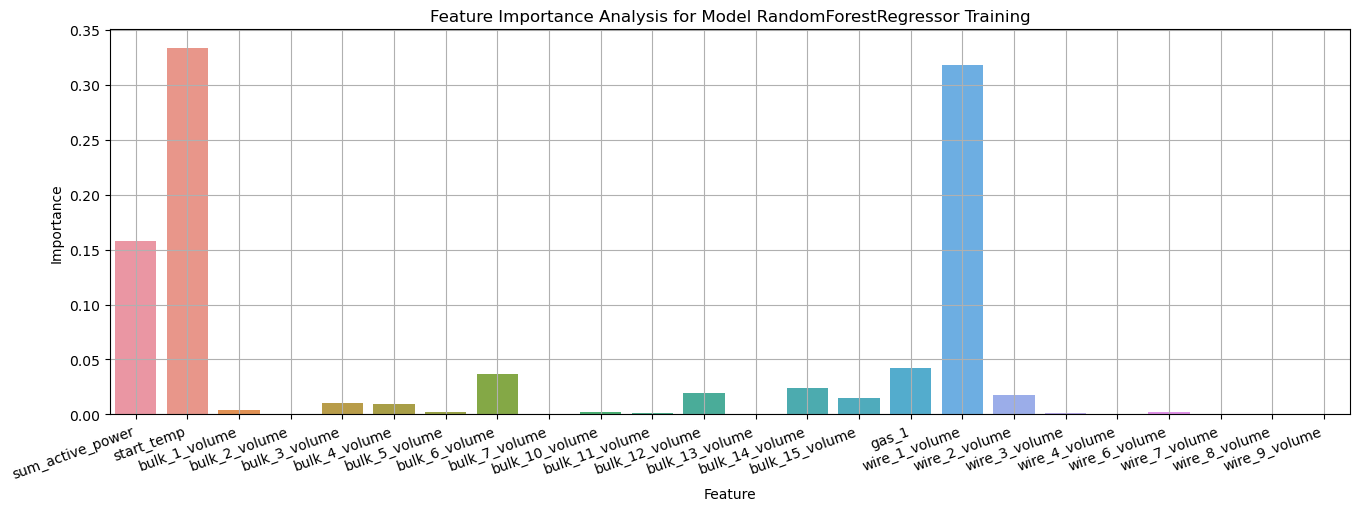

CPU times: total: 40.3 s
Wall time: 41.7 s


In [118]:
%%time
learn_models(forest, 
             features_train, 
             target_train, 
             params=forest_params, 
             regr_name='')

**Linear Regressions**

In [119]:
%%time
learn_models(lr, 
             features_train, 
             target_train, 
             params={}, 
             regr_name='')

<Figure size 1600x500 with 0 Axes>

CPU times: total: 172 ms
Wall time: 644 ms


**Light Gradient Booster Regressor**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1669
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 14
[LightGBM] [Info] Start training from score 1595.292056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1672
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 14
[LightGBM] [Info] Start training from score 1595.790498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train

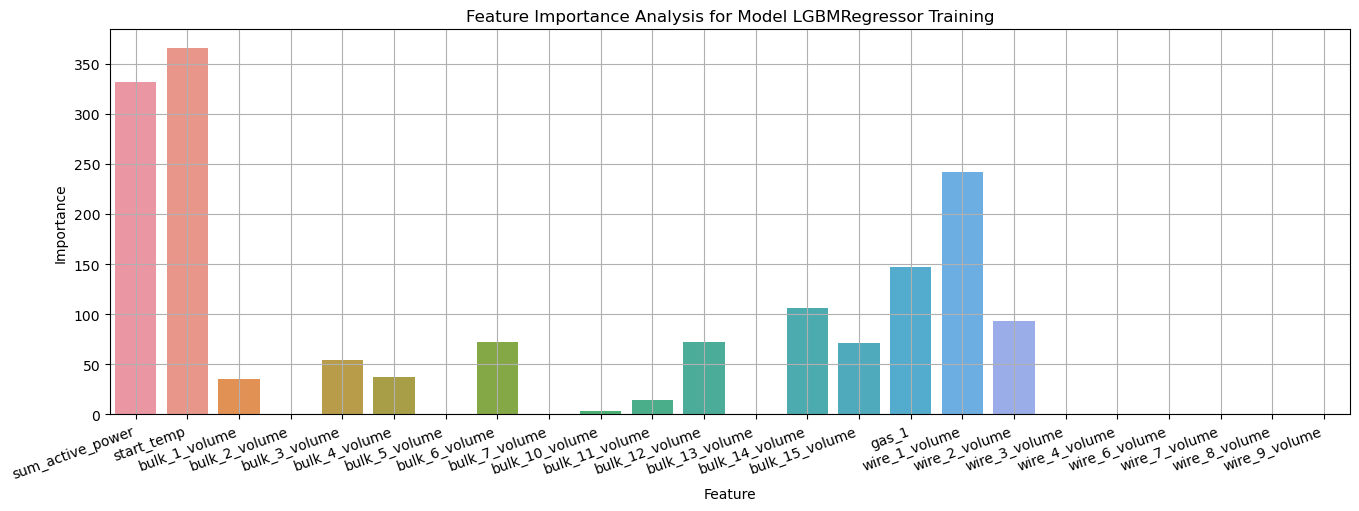

CPU times: total: 40min 9s
Wall time: 4min 21s


In [120]:
%%time
learn_models(lgbmr, 
             features_train, 
             target_train, 
             params=lgbmr_params, 
             regr_name='')

**CatBoostRegressor**

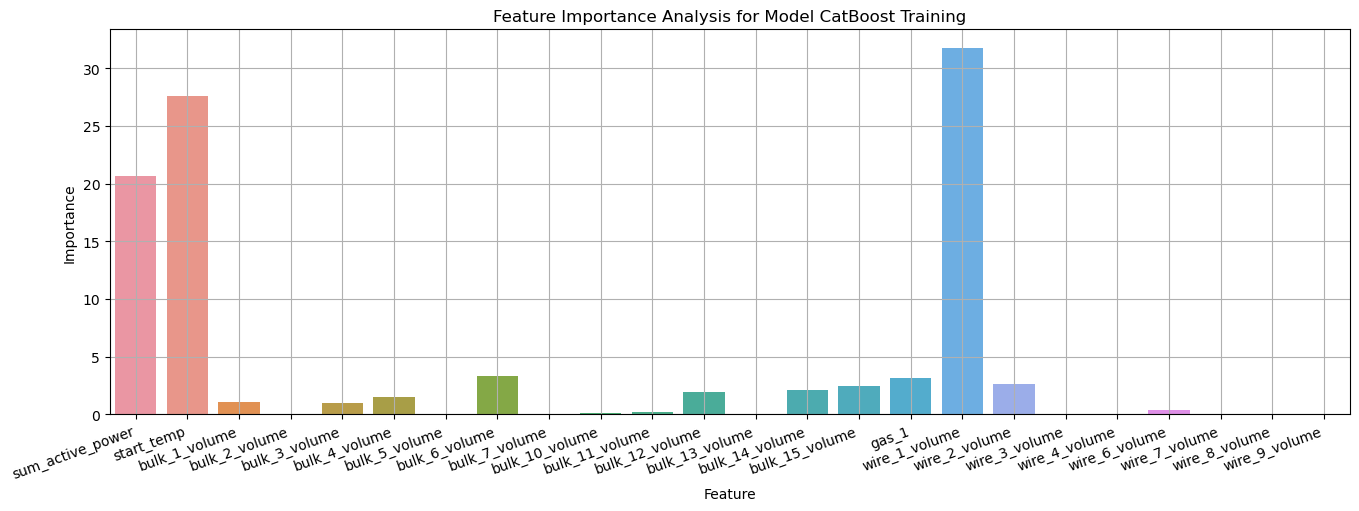

CPU times: total: 16min 40s
Wall time: 13min 7s


In [121]:
%%time
learn_models(catb, 
             features_train, 
             target_train, 
             params=catr_params, 
             regr_name='CatBoost')

**XGBRegressor**

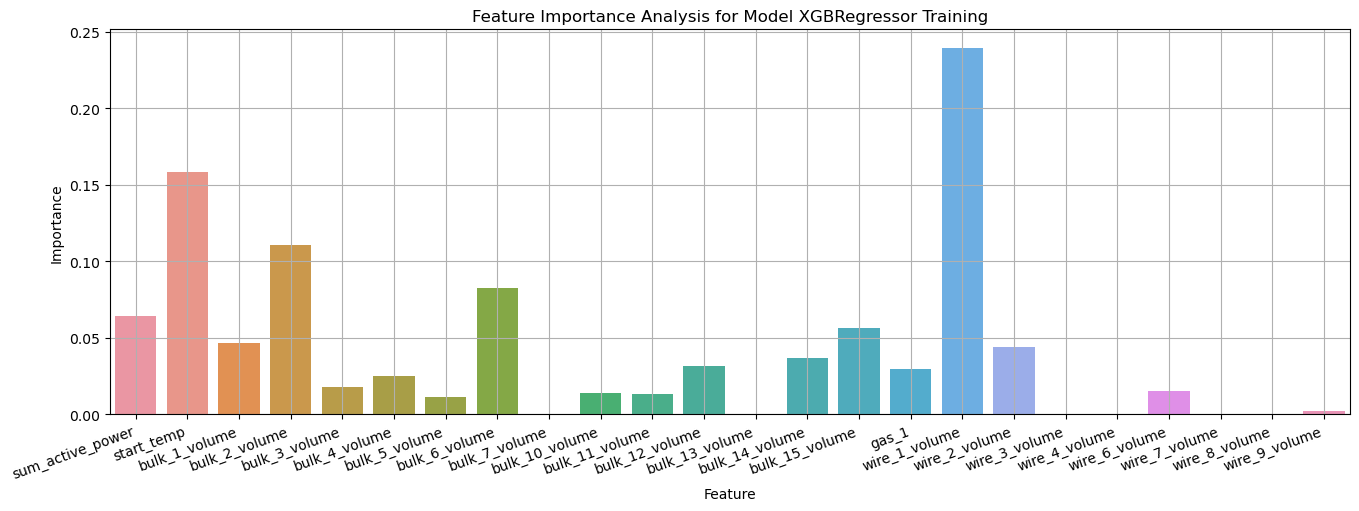

CPU times: total: 44min 48s
Wall time: 5min 24s


In [122]:
%%time
learn_models(xgbr, 
             features_train, 
             target_train, 
             params=xgbr_params, 
             regr_name='')

In [123]:
# Train Result

results.sort_values('mae_train')

model  mae_train  train_duration  \
4               CatBoost    5.86823            1.53   
5           XGBRegressor    5.92673            0.11   
3          LGBMRegressor    5.99317            0.09   
1  RandomForestRegressor    6.11339            1.00   
0  DecisionTreeRegressor    6.97189            0.01   
2       LinearRegression    7.32309            0.00   

                                      best_estimator  
4  <catboost.core.CatBoostRegressor object at 0x0...  
5  XGBRegressor(base_score=None, booster=None, ca...  
3  LGBMRegressor(learning_rate=0.05, max_depth=6,...  
1  (DecisionTreeRegressor(criterion='friedman_mse...  
0  DecisionTreeRegressor(criterion='friedman_mse'...  
2                                 LinearRegression()

#### Models Cross-Validation

In [124]:
# Define the number of folds
num_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=12345)

# Initialize the linear regression model
reg_model = LinearRegression()

# Define the scoring metric (MAE in this case)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(reg_model, features, target, cv=kf, scoring=scorer)

# Convert the negative MAE scores to positive
cv_scores = -cv_scores

# Print the MAE scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: MAE = {score:.2f}")

# Calculate and print the average MAE across all folds
average_mae = np.mean(cv_scores)
print(f"\nAverage MAE: {average_mae:.2f}")


Fold 1: MAE = 7.80
Fold 2: MAE = 7.59
Fold 3: MAE = 7.20
Fold 4: MAE = 6.86
Fold 5: MAE = 7.19

Average MAE: 7.33


#### Model Sanity Checking

In [125]:
# Split your data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, 
                                                            target, 
                                                            test_size=0.25, 
                                                            random_state=random_state)

# Create a DummyRegressor
dummtarget_model = DummyRegressor(strategy='mean')

# Train the dummy model
dummtarget_model.fit(features_train, target_train)

# Make predictions on the test set
target_pred = dummtarget_model.predict(features_test)

# Calculate the Mean Absolute Error (MAE) as a baseline metric
mae_baseline = mean_absolute_error(target_test, target_pred)

print(f"Dummy Model MAE: {mae_baseline:.2f}")


Dummy Model MAE: 10.48


Generally, the MAE of all trained models are lower than MAE of cross validation model (7.33) & MAE ofdummy model (10.48). 

####  Model Prediction

In [127]:
%%time

results['mae_test'] = np.nan
results['test_duration'] = np.nan

for i in range(len(results)):
        model = results['best_estimator'][i]
        test_start = time.time()
        model.fit(features_train, target_train)
        prediction = model.predict(features_test)
        test_end = time.time()
        results['mae_test'][i] = mean_absolute_error(prediction, target_test)
        results['test_duration'][i] = test_end-test_start   

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 14
[LightGBM] [Info] Start training from score 1595.560125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [128]:
final_results = results[['model','mae_train','train_duration','mae_test','test_duration']]
final_results['less_than_8.7'] = final_results['mae_test'] <= 8.7
final_results['less_than_6'] = final_results['mae_test'] <= 6.0
final_results.sort_values(by='mae_test')

model  mae_train  train_duration  mae_test  test_duration  \
4               CatBoost    5.86823            1.53  5.646538       1.901931   
5           XGBRegressor    5.92673            0.11  5.650642       0.111962   
3          LGBMRegressor    5.99317            0.09  5.739403       0.096511   
1  RandomForestRegressor    6.11339            1.00  5.834845       0.886129   
0  DecisionTreeRegressor    6.97189            0.01  6.924443       0.007000   
2       LinearRegression    7.32309            0.00  7.187642       0.000000   

   less_than_8.7  less_than_6  
4           True         True  
5           True         True  
3           True         True  
1           True         True  
0           True        False  
2           True        False

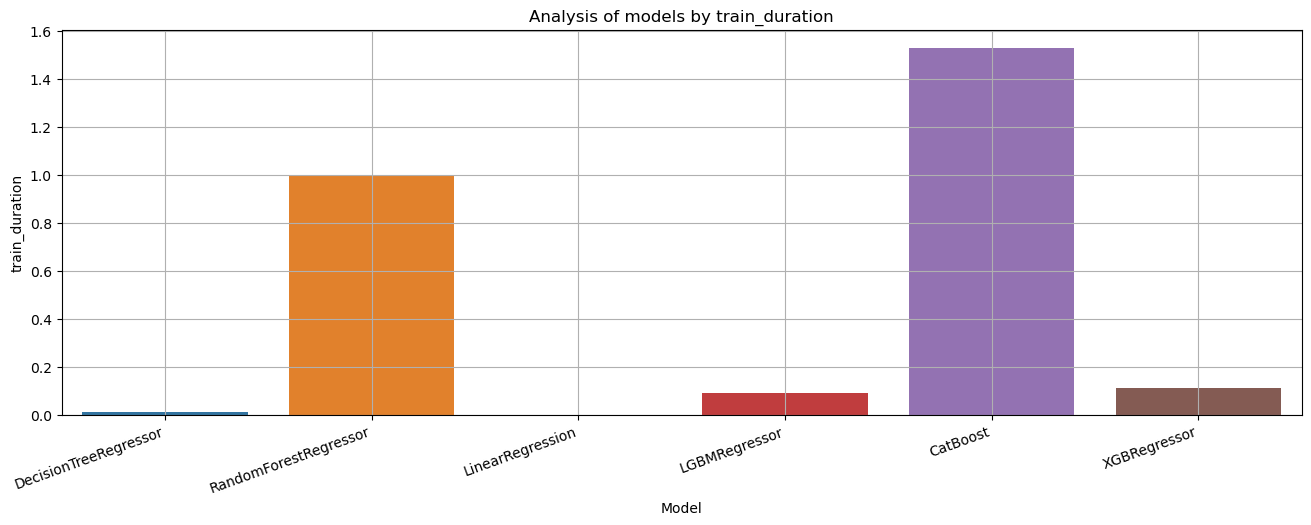

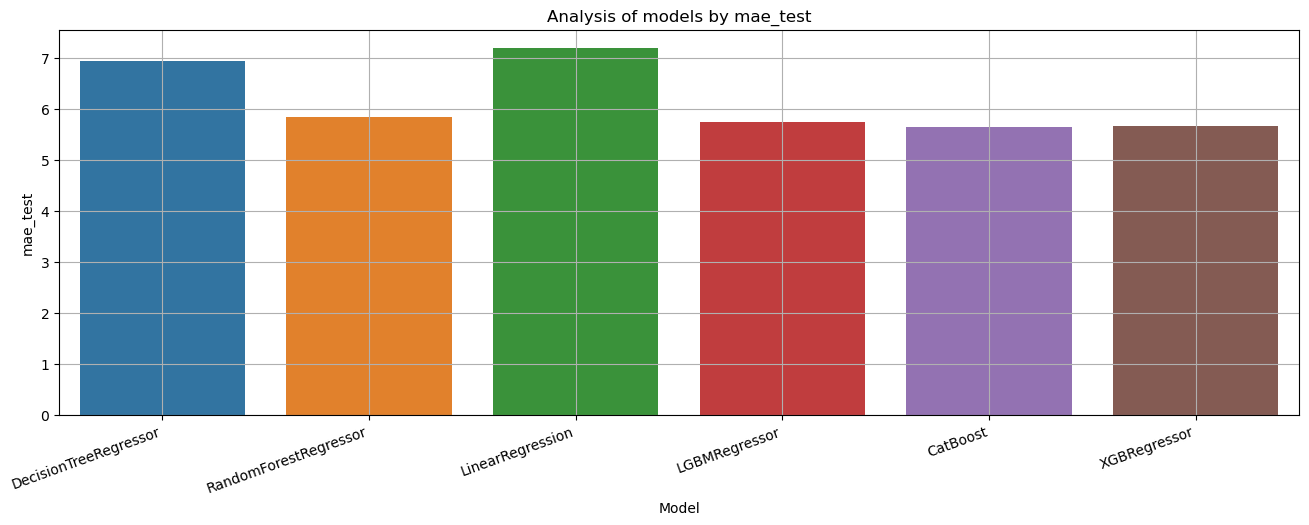

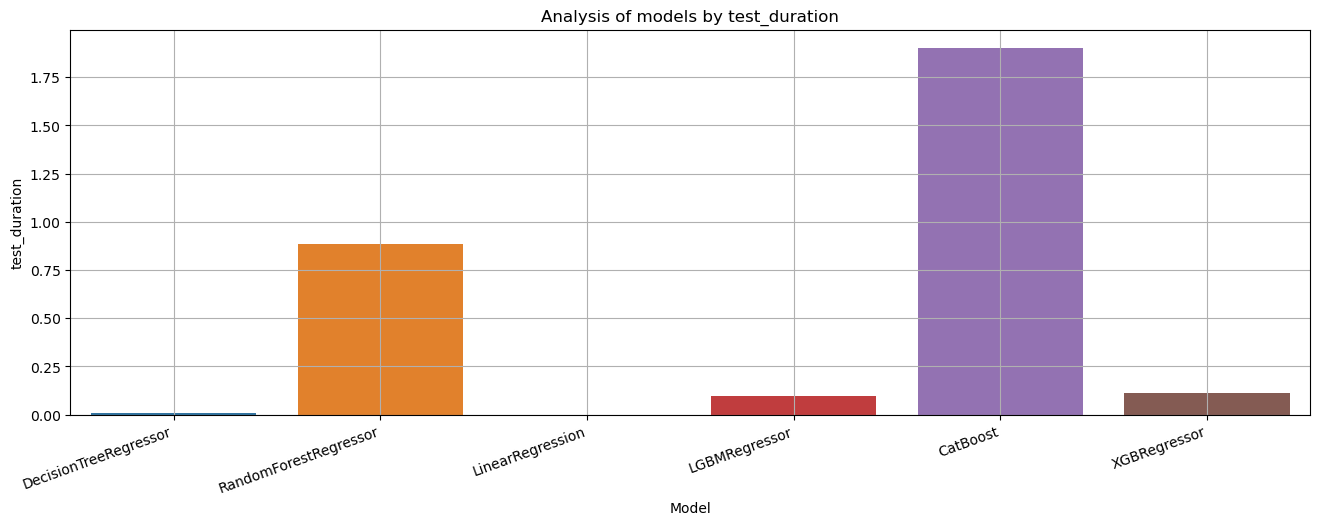

In [129]:
for column in ['train_duration','mae_test','test_duration']:
    plt.figure(figsize=(16,5))
    ax = sns.barplot(x=final_results['model'], y=final_results[column])
    ax.set(xlabel='Model', ylabel=column, title=f'Analysis of models by {column}')
    plt.setp(ax.get_xticklabels(), rotation=20, ha="right")
    ax.grid(True)
    plt.show()

Based on the data obtained, the most suitable three models for this study requirement are as below:

The quality & running time of predictions on the test set:

1. CatBoostRegressor (MAE ~ 5.65, test duration ~ 1.90s)
2. XGBRegressor (MAE ~ 5.65, test duration ~ 0.11s)
3. LGBMRegressor (MAE ~ 5.74, test duration ~ 0.10s)

**Section conclusion:**
1. The neg_mean_absolute_error scoring is essentially the negative of the Mean Absolute Error (MAE). It's designed this way because scikit-learn's cross-validation and grid search functions aim to maximize scoring values, so they use the negation of error metrics to find the best model. A lower (more negative) neg_mean_absolute_error indicates better model performance.

2. Three models (CatBoostRegressor, XGBRegressor, and LGBMRegressor) meet the minimum MAE value requirement (<= 8.7) and have an optimal MAE value <6. The model with the lowest MAE value is CatBoostRegressor with a value of lowest MAE of training dataset of 5.87 & lowest MAE of test dataset of 5.65.

3. The close similarity in MAE values between the training set and the test set demonstrates that there is no overfitting in the model, indicating its accuracy.

4. The optimal model for all three features is XGBRegressor. Her training lasts 0.11 seconds, and the prediction is about 0.52 seconds.

5. If we try to improve predictions in term of MAE, regardless of training time: we can choose CatBoostRegressor.

## Discussion

### Stages that have been completed

The stages that have been completed in this project are:

Data Collection: All datasets are provided.

Data Preprocessing:

Data Cleaning: standardise column names, drop unused columns, handle missing values, fixing data types, removing outliers, and anomalies in the  dataset.

Feature Engineering: Select and transform relevant features that can help to improve model's accuracy. This involves creating new features.

Train-Test Split: The processed final dataset will be splitted into 2 datasets, train and test with a ratio of 3:1.
Tested several Regression Models:

1. Decision Tree Regression
2. Random Forest Regression
3. Linear Regression
4. LGBMRegressor
5. CatBoostRegressor
6. XGBRegressor

Model Training: Train the selected regression models on the training dataset. No deep learning is utilised.

Model Evaluation: Evaluate the model's performance on the testing dataset using Mean Absolute Error (MAE). The used scoring will be: 'neg_mean_absolute_error' (the scoring metric for cross-validation to negative mean absolute error (neg_MAE). In scikit-learn, it's common to use neg_MAE instead of MAE for scoring because scikit-learn optimises for maximising scores, but we typically want to minimize MAE. Thus, using the negative MAE allows the optimisation process to work correctly. 

Additionally, we have used cross validation to assess the performance of a machine learning model and to reduce the risk of overfitting. The cross-validation score provides a more reliable estimate of the model's performance on unseen data compared to a single train-test split.

MAE must be less than 8.7, thus we need to determine the optimal model. Optimal MAE shall be less than 6.

Hyperparameter Tuning: Fine-tune the models' hyperparameters to improve their performance. We used grid search to find out the best model and best params.

Prediction: Once the regression model are trained, we use it to make predictions on new data points.

What difficulties arose? And how did we overcome them?
The project required additional study of the process technology.
There were many gaps in the data, some had to be removed, some were replaced with zero values.

### Model evaluation report

Since the MAE values for testing data of all models meet the minimum requirement of <8.7, it can be said that the final dataset, which has undergone data preprocessing and exploratory data analysis (EDA), is fit for our study, and the process is quite optimal. This can also be observed from the MAE values on the training set and test set, which are not significantly different, indicating the model is not overfitting.

### Conclusion

This project has successfully trained a few models, those are capable of predicting the optimal end temperature of metal during steel processing to enhance energy efficiency and reduce production costs. The plant can utilise the CatBoostRegressor model with the known best parameters to predict the optimal end temperature. With an MAE value of 5.65, it indicates that the average error between the model's predictions and the actual values in the test data is approximately 5.65 degree Celsius.

### Recommendations

This project only uses one measurement metric, which is MAE. It would be better if other metrics, such as R2, MSE, RMSE, were also used for measurement.

By using the RMSE metric, it is possible to measure the average error between the model's predictions and the actual values in the same units as the target variable. Additionally, R-squared does not provide information about how well the model fits the data.

## Conclusion

For this project, a few models successfully predict the final melting temperature of steel. The difference between the prediction and the actual temperature is less than 6 degree Celcius. The model will be able to suggest when it is necessary to stop heating the mixture, thereby reducing the time of operation of the electrodes and reducing the power consumption.

In the future, it will be possible to create an additional model when making changes to the data collection, according to the recommendations. Based on the input data on the initial mixture and the desired steel grade, it will be able to issue guidance on the materials to be added, the volume of gas, and the duration of heating. Its predictions can be used for the production error control system and signal to the process operator that violations or deviations from the norm have been made in the process.